---
## Investigating the Impact of Internet Usage on Economic , Political, and Environmental Development in East and South Africa #

**1. Project Objectives:**

 - To analyze how increased internet usage affects economic, political, and environmental development in East and South Africa by examining key relationships, trends, and predictors.

**2. Stakeholders and Audience:**

 - Government Agencies: Ministries of Communications, Economic Development, and Environmental Protection in East and South African countries, who can use the findings to shape policies that enhance internet access and leverage it for development.

 - International Development Organizations: Entities such as the World Bank, United Nations Development Programme (UNDP), and International Telecommunication Union (ITU) that support ICT and economic growth initiatives.

 - Policy Makers: Leaders and strategists responsible for crafting policies aimed at improving infrastructure, governance, and economic development.

 - Non-Governmental Organizations (NGOs): Focused on enhancing digital literacy, equitable access, and sustainable development.

**3. Key Questions:**


 1️⃣ **How does increased internet usage statistically influence GDP growth in East and South African countries?**
 - The analysis indicates a significant positive relationship between internet usage and GDP, suggesting that increased digital connectivity can be linked to economic development.

 2️⃣ **To what extent does internet usage impact governance quality, specifically metrics like the rule of law and government effectiveness?**
 - Inferential results highlight whether higher internet penetration correlates with improved governance metrics or if these remain unaffected by digital adoption.

 3️⃣ **Is there a significant difference in CO2 emissions between countries with high and low internet usage, and how does internet usage impact environmental sustainability?**
 - This question aims to explore whether internet usage contributes to higher emissions or supports more sustainable practices through technological advancements.

 4️⃣ **Does access to electricity moderate the relationship between internet usage and economic growth, and what are the implications for infrastructure policies?**
 - The analysis can reveal if the benefits of increased internet usage on GDP are conditional on sufficient access to electricity, guiding infrastructure investment strategies.

 5️⃣ **What are the critical factors that differentiate countries where increased internet penetration has led to substantial economic or social improvements from those where it has not?**
 - Identifying the underlying variables, such as governance effectiveness, educational expenditure, or income inequality, that may amplify or limit the impact of internet usage.

---


---

## **Data Loading and Initial Processing**

---

In [43]:
# Importing necessary libraries for analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Load the dataset
data = pd.read_csv('/Users/jeesoojhun/Documents/Flatiron/Assessments/Phase 3/Internet_Impact_Analysis_Africa/world_bank_development_indicators.csv')


In [44]:
# Display initial diagnostic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16780 entries, 0 to 16779
Data columns (total 50 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    16780 non-null  object 
 1   date                                       16780 non-null  object 
 2   agricultural_land%                         15298 non-null  float64
 3   forest_land%                               7914 non-null   float64
 4   land_area                                  15608 non-null  float64
 5   avg_precipitation                          10086 non-null  float64
 6   trade_in_services%                         9165 non-null   float64
 7   control_of_corruption_estimate             4564 non-null   float64
 8   control_of_corruption_std                  4564 non-null   float64
 9   access_to_electricity%                     7348 non-null   float64
 10  renewvable_energy_cons

In [45]:
data.describe()

agricultural_land%  forest_land%     land_area  avg_precipitation  \
count        15298.000000   7914.000000  1.560800e+04       10086.000000   
mean            37.527578     32.434329  5.250933e+06        1214.021416   
std             20.541039     23.375578  1.509887e+07         810.573031   
min              0.262821      0.000000  2.027000e+00          18.100000   
25%             21.440846     12.430556  2.164000e+04         591.000000   
50%             37.694142     30.767208  1.998100e+05        1110.000000   
75%             51.439863     47.182057  1.260000e+06        1782.000000   
max             93.440750     98.574551  1.299870e+08        3240.000000   

       trade_in_services%  control_of_corruption_estimate  \
count         9165.000000                     4564.000000   
mean            20.817655                       -0.025252   
std             23.102523                        0.999537   
min              0.620993                       -1.916457   
25%              8.670266                       -0.789468   
50%             13.318612                       -0.259419   
75%             24.283488                        0.666368   
max            316.320342                        2.459118   

       control_of_corruption_std  access_to_electricity%  \
count                4564.000000             7348.000000   
mean                    0.205194               80.758271   
std                     0.096058               28.745117   
min                     0.114779                0.533899   
25%                     0.147604               68.435427   
50%                     0.172769               98.290939   
75%                     0.227055              100.000000   
max                     0.991055              100.000000   

       renewvable_energy_consumption%  electric_power_consumption  ...  \
count                     8076.000000                 7790.000000  ...   
mean                        31.029558                 2885.316356  ...   
std                         29.858553                 4103.209615  ...   
min                          0.000000                    5.548906  ...   
25%                          5.065460                  375.934172  ...   
50%                         20.989980                 1331.112025  ...   
75%                         53.904220                 3893.175308  ...   
max                         98.340000                54799.174708  ...   

       multidimensional_poverty_headcount_ratio%   gini_index    birth_rate  \
count                                 494.000000  1936.000000  16037.000000   
mean                                   26.944060    37.972831     28.203396   
std                                    11.230843     8.958106     12.862504   
min                                     2.370000    20.700000      5.000000   
25%                                    18.300000    31.200000     16.438000   
50%                                    24.600000    35.800000     27.065000   
75%                                    33.050000    43.400000     39.752000   
max                                    74.200000    65.800000     58.121000   

         death_rate  life_expectancy_at_birth    population  rural_population  \
count  16019.000000              15866.000000  1.666500e+04      1.653900e+04   
mean      10.490277                 64.254415  2.159657e+08      1.230971e+08   
std        5.358993                 11.112404  7.102956e+08      4.087557e+08   
min        0.795000                 11.995000  2.646000e+03      0.000000e+00   
25%        6.976522                 56.810602  9.940000e+05      4.295845e+05   
50%        9.200000                 66.776719  6.787419e+06      3.148533e+06   
75%       12.441818                 72.568000  4.641603e+07      2.036615e+07   
max      103.534000                 85.497561  7.951150e+09      3.435441e+09   

       voice_and_accountability_estimate  voice_and_accountability_std  \
count                        4648.000000        

In [46]:
# Display the first few rows for an overview
data.head()

country        date  agricultural_land%  forest_land%  land_area  \
0  Afghanistan  1960-01-01                 NaN           NaN        NaN   
1  Afghanistan  1961-01-01           57.801696           NaN   652230.0   
2  Afghanistan  1962-01-01           57.893688           NaN   652230.0   
3  Afghanistan  1963-01-01           57.970348           NaN   652230.0   
4  Afghanistan  1964-01-01           58.066940           NaN   652230.0   

   avg_precipitation  trade_in_services%  control_of_corruption_estimate  \
0                NaN                 NaN                             NaN   
1              327.0                 NaN                             NaN   
2              327.0                 NaN                             NaN   
3              327.0                 NaN                             NaN   
4              327.0                 NaN                             NaN   

   control_of_corruption_std  access_to_electricity%  ...  \
0                        NaN                     NaN  ...   
1                        NaN                     NaN  ...   
2                        NaN                     NaN  ...   
3                        NaN                     NaN  ...   
4                        NaN                     NaN  ...   

   multidimensional_poverty_headcount_ratio%  gini_index  birth_rate  \
0                                        NaN         NaN      50.340   
1                                        NaN         NaN      50.443   
2                                        NaN         NaN      50.570   
3                                        NaN         NaN      50.703   
4                                        NaN         NaN      50.831   

   death_rate  life_expectancy_at_birth  population  rural_population  \
0      31.921                    32.535   8622466.0         7898093.0   
1      31.349                    33.068   8790140.0         8026804.0   
2      30.845                    33.547   8969047.0         8163985.0   
3      30.359                    34.016   9157465.0         8308019.0   
4      29.867                    34.494   9355514.0         8458694.0   

   voice_and_accountability_estimate  voice_and_accountability_std  \
0                                NaN                           NaN   
1                                NaN                           NaN   
2                                NaN                           NaN   
3                                NaN                           NaN   
4                                NaN                           NaN   

   intentional_homicides  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  

[5 rows x 50 columns]

I'll proceed with filtering the dataset for the relevant regions (East and South Africa) and continue the data cleaning before running the proposed analyses.

In [47]:
# Filter the dataset for countries in East and South Africa
# Assume the list of countries in these regions
east_south_africa_countries = [
    'Kenya', 'Tanzania', 'Uganda', 'Rwanda', 'Burundi', 'Ethiopia',
    'Somalia', 'Mozambique', 'Zambia', 'Zimbabwe', 'Malawi',
    'South Africa', 'Botswana', 'Namibia', 'Eswatini', 'Lesotho'
]

# Filter the data
regional_data = data[data['country'].isin(east_south_africa_countries)]



In [48]:
# Display basic information about the filtered data
regional_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1008 entries, 1764 to 16779
Data columns (total 50 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    1008 non-null   object 
 1   date                                       1008 non-null   object 
 2   agricultural_land%                         960 non-null    float64
 3   forest_land%                               496 non-null    float64
 4   land_area                                  960 non-null    float64
 5   avg_precipitation                          928 non-null    float64
 6   trade_in_services%                         574 non-null    float64
 7   control_of_corruption_estimate             368 non-null    float64
 8   control_of_corruption_std                  368 non-null    float64
 9   access_to_electricity%                     430 non-null    float64
 10  renewvable_energy_consump

In [49]:
regional_data.head()

country        date  agricultural_land%  forest_land%  land_area  \
1764  Botswana  1960-01-01                 NaN           NaN        NaN   
1765  Botswana  1961-01-01           45.877225           NaN   566730.0   
1766  Botswana  1962-01-01           45.877225           NaN   566730.0   
1767  Botswana  1963-01-01           45.877225           NaN   566730.0   
1768  Botswana  1964-01-01           45.877225           NaN   566730.0   

      avg_precipitation  trade_in_services%  control_of_corruption_estimate  \
1764                NaN                 NaN                             NaN   
1765              416.0                 NaN                             NaN   
1766              416.0                 NaN                             NaN   
1767              416.0                 NaN                             NaN   
1768              416.0                 NaN                             NaN   

      control_of_corruption_std  access_to_electricity%  ...  \
1764                        NaN                     NaN  ...   
1765                        NaN                     NaN  ...   
1766                        NaN                     NaN  ...   
1767                        NaN                     NaN  ...   
1768                        NaN                     NaN  ...   

      multidimensional_poverty_headcount_ratio%  gini_index  birth_rate  \
1764                                        NaN         NaN      47.090   
1765                                        NaN         NaN      46.586   
1766                                        NaN         NaN      46.094   
1767                                        NaN         NaN      46.186   
1768                                        NaN         NaN      46.240   

      death_rate  life_expectancy_at_birth  population  rural_population  \
1764      16.770                    50.372    512865.0          497171.0   
1765      16.301                    50.891    524403.0          508162.0   
1766      15.839                    51.389    536428.0          519616.0   
1767      15.418                    51.881    549041.0          531631.0   
1768      15.031                    52.349    562274.0          543618.0   

      voice_and_accountability_estimate  voice_and_accountability_std  \
1764                                NaN                           NaN   
1765                                NaN                           NaN   
1766                                NaN                           NaN   
1767                                NaN                           NaN   
1768                                NaN                           NaN   

      intentional_homicides  
1764                    NaN  
1765                    NaN  
1766                    NaN  
1767                    NaN  
1768                    NaN  

[5 rows x 50 columns]

Initial Observations on the Filtered Data :

- Filtered Dataset Size: 1,008 rows specific to East and South Africa.

- Data Coverage: Includes countries like Botswana, Kenya, Tanzania, etc.

- Key Indicators:
Columns like agricultural_land% , life_expectancy_at_birth, and population have good data coverage.

- Significant missing data in columns such as control_of_corruption_estimate, forest_land%, and gini_index.

### **Data Cleaning**


**1. Remove Irrelevant Columns:**
Focus on columns that are essential for the analysis based on the project objectives and key data columns identified earlier.
Drop any columns that are not relevant to economic, political, or environmental development.

**2. Handle Missing Values:**
Drop columns with a high percentage of missing values that are not critical to the analysis.
Impute missing values using median or mean for numerical columns and mode for categorical columns, if needed.

**3. Convert Data Types:**
Ensure that columns like date are converted to the appropriate datetime format for time-series analysis.
Check that numerical columns are in the correct data type (e.g., float, int).

**4. Remove Duplicates:**
Check for and remove any duplicate rows to avoid redundant data entries.

**5. Outlier Detection and Handling:**
Use statistical techniques (e.g., IQR or Z-score) to detect outliers in key columns and decide whether to cap, transform, or remove them based on their impact.

In [50]:
# Check for missing values
regional_data.isnull().sum()



country                                        0
date                                           0
agricultural_land%                            48
forest_land%                                 512
land_area                                     48
avg_precipitation                             80
trade_in_services%                           434
control_of_corruption_estimate               640
control_of_corruption_std                    640
access_to_electricity%                       578
renewvable_energy_consumption%               506
electric_power_consumption                   642
CO2_emisions                                 513
other_greenhouse_emisions                    513
population_density                            48
inflation_annual%                            351
real_interest_rate                           435
risk_premium_on_lending                      598
research_and_development_expenditure%        937
central_goverment_debt%                      872
tax_revenue%        

In [101]:
# Data Cleaning for regional_data

# Select only relevant columns for analysis
columns_to_keep = [
    'country', 'date', 'individuals_using_internet%', 'GDP_current_US',
    'access_to_electricity%', 'government_expenditure_on_education%', 'trade_in_services%',
    'CO2_emisions', 'renewvable_energy_consumption%', 'rule_of_law_estimate',
    'goverment_effectiveness_estimate', 'political_stability_estimate', 'population_density',
    'gini_index', 'human_capital_index'
]
regional_data_cleaned = regional_data[columns_to_keep]


In [102]:
regional_data_cleaned.head()

country        date  individuals_using_internet%  GDP_current_US  \
1764  Botswana  1960-01-01                          0.0    3.041142e+07   
1765  Botswana  1961-01-01                          NaN    3.290259e+07   
1766  Botswana  1962-01-01                          NaN    3.564493e+07   
1767  Botswana  1963-01-01                          NaN    3.809183e+07   
1768  Botswana  1964-01-01                          NaN    4.161637e+07   

      access_to_electricity%  government_expenditure_on_education%  \
1764                     NaN                                   NaN   
1765                     NaN                                   NaN   
1766                     NaN                                   NaN   
1767                     NaN                                   NaN   
1768                     NaN                                   NaN   

      trade_in_services%  CO2_emisions  renewvable_energy_consumption%  \
1764                 NaN           NaN                             NaN   
1765                 NaN           NaN                             NaN   
1766                 NaN           NaN                             NaN   
1767                 NaN           NaN                             NaN   
1768                 NaN           NaN                             NaN   

      rule_of_law_estimate  goverment_effectiveness_estimate  \
1764                   NaN                               NaN   
1765                   NaN                               NaN   
1766                   NaN                               NaN   
1767                   NaN                               NaN   
1768                   NaN                               NaN   

      political_stability_estimate  population_density  gini_index  \
1764                           NaN                 NaN         NaN   
1765                           NaN            0.925314         NaN   
1766                           NaN            0.946532         NaN   
1767                           NaN            0.968788         NaN   
1768                           NaN            0.992137         NaN   

      human_capital_index  
1764                  NaN  
1765                  NaN  
1766                  NaN  
1767                  NaN  
1768                  NaN

In [103]:
# Convert 'date' column to datetime format if not already done
regional_data_cleaned['date'] = pd.to_datetime(regional_data_cleaned['date'], errors='coerce')

# Extract the year from the 'date' column
regional_data_cleaned['year'] = regional_data_cleaned['date'].dt.year

# Drop the original 'date' column if only the year is needed
regional_data_cleaned.drop(columns=['date'], inplace=True)

In [104]:
regional_data_cleaned.head()

country  individuals_using_internet%  GDP_current_US  \
1764  Botswana                          0.0    3.041142e+07   
1765  Botswana                          NaN    3.290259e+07   
1766  Botswana                          NaN    3.564493e+07   
1767  Botswana                          NaN    3.809183e+07   
1768  Botswana                          NaN    4.161637e+07   

      access_to_electricity%  government_expenditure_on_education%  \
1764                     NaN                                   NaN   
1765                     NaN                                   NaN   
1766                     NaN                                   NaN   
1767                     NaN                                   NaN   
1768                     NaN                                   NaN   

      trade_in_services%  CO2_emisions  renewvable_energy_consumption%  \
1764                 NaN           NaN                             NaN   
1765                 NaN           NaN                             NaN   
1766                 NaN           NaN                             NaN   
1767                 NaN           NaN                             NaN   
1768                 NaN           NaN                             NaN   

      rule_of_law_estimate  goverment_effectiveness_estimate  \
1764                   NaN                               NaN   
1765                   NaN                               NaN   
1766                   NaN                               NaN   
1767                   NaN                               NaN   
1768                   NaN                               NaN   

      political_stability_estimate  population_density  gini_index  \
1764                           NaN                 NaN         NaN   
1765                           NaN            0.925314         NaN   
1766                           NaN            0.946532         NaN   
1767                           NaN            0.968788         NaN   
1768                           NaN            0.992137         NaN   

      human_capital_index  year  
1764                  NaN  1960  
1765                  NaN  1961  
1766                  NaN  1962  
1767                  NaN  1963  
1768                  NaN  1964

In [105]:
# Check for missing values
regional_data_cleaned.isnull().sum()

country                                   0
individuals_using_internet%             467
GDP_current_US                          142
access_to_electricity%                  578
government_expenditure_on_education%    582
trade_in_services%                      434
CO2_emisions                            513
renewvable_energy_consumption%          506
rule_of_law_estimate                    640
goverment_effectiveness_estimate        640
political_stability_estimate            640
population_density                       48
gini_index                              931
human_capital_index                     954
year                                      0
dtype: int64

In [57]:
regional_data_cleaned.describe()

individuals_using_internet%  GDP_current_US  access_to_electricity%  \
count                   541.000000    8.660000e+02              430.000000   
mean                      7.228422    2.023509e+10               29.100410   
std                      13.454492    5.814606e+10               22.084663   
min                       0.000000    3.041142e+07                0.533899   
25%                       0.006172    1.136571e+09               10.692671   
50%                       1.110000    3.933061e+09               24.661250   
75%                       7.000000    1.183896e+10               42.717198   
max                      73.500000    4.581995e+11               90.000000   

       government_expenditure_on_education%  trade_in_services%  \
count                            426.000000          574.000000   
mean                               5.146358           15.192291   
std                                3.017656           12.317216   
min                                0.127174            2.740865   
25%                                3.510605            8.689623   
50%                                4.934685           12.476035   
75%                                6.028597           17.331300   
max                               44.333981           99.197413   

        CO2_emisions  renewvable_energy_consumption%  rule_of_law_estimate  \
count     495.000000                      502.000000            368.000000   
mean    25872.616639                       72.259721             -0.575278   
std     87173.417270                       25.262960              0.695618   
min       159.600000                        7.720000             -2.590877   
25%      1001.050000                       56.550000             -0.909757   
50%      2276.600000                       82.065000             -0.468431   
75%      6552.850000                       91.835000             -0.176256   
max    448298.100000                       97.510000              0.670592   

       goverment_effectiveness_estimate  political_stability_estimate  \
count                        368.000000                    368.000000   
mean                          -0.594799                     -0.542942   
std                            0.645335                      0.959729   
min                           -2.445096                     -3.312951   
25%                           -0.891880                     -1.192187   
50%                           -0.598456                     -0.366829   
75%                           -0.295573                      0.082604   
max                            1.020496                      1.201015   

       population_density  gini_index         year  
count          960.000000    77.00000  1008.000000  
mean            66.667349    48.54026  1991.000000  
std             91.503949     9.31739    18.193269  
min              0.730513    29.80000  1960.000000  
25%             14.147966    42.30000  1975.000000  
50%             33.541155    46.50000  1991.000000  
75%             68.394303    55.60000  2007.000000  
max            532.888610    65.80000  2022.000000

In [106]:
# Impute missing values for numerical columns with the median
for column in regional_data_cleaned.select_dtypes(include=['float64']).columns:
    regional_data_cleaned[column].fillna(regional_data_cleaned[column].median(), inplace=True)

# Verify that there are no missing values left
regional_data_cleaned.isnull().sum()

country                                 0
individuals_using_internet%             0
GDP_current_US                          0
access_to_electricity%                  0
government_expenditure_on_education%    0
trade_in_services%                      0
CO2_emisions                            0
renewvable_energy_consumption%          0
rule_of_law_estimate                    0
goverment_effectiveness_estimate        0
political_stability_estimate            0
population_density                      0
gini_index                              0
human_capital_index                     0
year                                    0
dtype: int64

In [107]:
# Remove duplicate rows if any
regional_data_cleaned = regional_data_cleaned.drop_duplicates()

In [108]:
regional_data_cleaned.head()

country  individuals_using_internet%  GDP_current_US  \
1764  Botswana                         0.00    3.041142e+07   
1765  Botswana                         1.11    3.290259e+07   
1766  Botswana                         1.11    3.564493e+07   
1767  Botswana                         1.11    3.809183e+07   
1768  Botswana                         1.11    4.161637e+07   

      access_to_electricity%  government_expenditure_on_education%  \
1764                24.66125                              4.934685   
1765                24.66125                              4.934685   
1766                24.66125                              4.934685   
1767                24.66125                              4.934685   
1768                24.66125                              4.934685   

      trade_in_services%  CO2_emisions  renewvable_energy_consumption%  \
1764           12.476035        2276.6                          82.065   
1765           12.476035        2276.6                          82.065   
1766           12.476035        2276.6                          82.065   
1767           12.476035        2276.6                          82.065   
1768           12.476035        2276.6                          82.065   

      rule_of_law_estimate  goverment_effectiveness_estimate  \
1764             -0.468431                         -0.598456   
1765             -0.468431                         -0.598456   
1766             -0.468431                         -0.598456   
1767             -0.468431                         -0.598456   
1768             -0.468431                         -0.598456   

      political_stability_estimate  population_density  gini_index  \
1764                     -0.366829           33.541155        46.5   
1765                     -0.366829            0.925314        46.5   
1766                     -0.366829            0.946532        46.5   
1767                     -0.366829            0.968788        46.5   
1768                     -0.366829            0.992137        46.5   

      human_capital_index  year  
1764             0.392443  1960  
1765             0.392443  1961  
1766             0.392443  1962  
1767             0.392443  1963  
1768             0.392443  1964

In [109]:
regional_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1008 entries, 1764 to 16779
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   country                               1008 non-null   object 
 1   individuals_using_internet%           1008 non-null   float64
 2   GDP_current_US                        1008 non-null   float64
 3   access_to_electricity%                1008 non-null   float64
 4   government_expenditure_on_education%  1008 non-null   float64
 5   trade_in_services%                    1008 non-null   float64
 6   CO2_emisions                          1008 non-null   float64
 7   renewvable_energy_consumption%        1008 non-null   float64
 8   rule_of_law_estimate                  1008 non-null   float64
 9   goverment_effectiveness_estimate      1008 non-null   float64
 10  political_stability_estimate          1008 non-null   float64
 11  population_density

In [110]:
# Outlier detection and handling using IQR
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

# Apply outlier handling to relevant columns
for column in regional_data_cleaned.select_dtypes(include=['float64']).columns:
    handle_outliers(regional_data_cleaned, column)

# Display the cleaned data
regional_data_cleaned.head()

country  individuals_using_internet%  GDP_current_US  \
1764  Botswana                         0.00    3.041142e+07   
1765  Botswana                         1.11    3.290259e+07   
1766  Botswana                         1.11    3.564493e+07   
1767  Botswana                         1.11    3.809183e+07   
1768  Botswana                         1.11    4.161637e+07   

      access_to_electricity%  government_expenditure_on_education%  \
1764                24.66125                              4.934685   
1765                24.66125                              4.934685   
1766                24.66125                              4.934685   
1767                24.66125                              4.934685   
1768                24.66125                              4.934685   

      trade_in_services%  CO2_emisions  renewvable_energy_consumption%  \
1764           12.476035        2276.6                          82.065   
1765           12.476035        2276.6                          82.065   
1766           12.476035        2276.6                          82.065   
1767           12.476035        2276.6                          82.065   
1768           12.476035        2276.6                          82.065   

      rule_of_law_estimate  goverment_effectiveness_estimate  \
1764             -0.468431                         -0.598456   
1765             -0.468431                         -0.598456   
1766             -0.468431                         -0.598456   
1767             -0.468431                         -0.598456   
1768             -0.468431                         -0.598456   

      political_stability_estimate  population_density  gini_index  \
1764                     -0.366829           33.541155        46.5   
1765                     -0.366829            0.925314        46.5   
1766                     -0.366829            0.946532        46.5   
1767                     -0.366829            0.968788        46.5   
1768                     -0.366829            0.992137        46.5   

      human_capital_index  year  
1764             0.392443  1960  
1765             0.392443  1961  
1766             0.392443  1962  
1767             0.392443  1963  
1768             0.392443  1964

In [111]:
regional_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1008 entries, 1764 to 16779
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   country                               1008 non-null   object 
 1   individuals_using_internet%           1008 non-null   float64
 2   GDP_current_US                        1008 non-null   float64
 3   access_to_electricity%                1008 non-null   float64
 4   government_expenditure_on_education%  1008 non-null   float64
 5   trade_in_services%                    1008 non-null   float64
 6   CO2_emisions                          1008 non-null   float64
 7   renewvable_energy_consumption%        1008 non-null   float64
 8   rule_of_law_estimate                  1008 non-null   float64
 9   goverment_effectiveness_estimate      1008 non-null   float64
 10  political_stability_estimate          1008 non-null   float64
 11  population_density

In [112]:
regional_data_cleaned.describe()

individuals_using_internet%  GDP_current_US  access_to_electricity%  \
count                  1008.000000    1.008000e+03            1.008000e+03   
mean                      1.254061    6.584766e+09            2.466125e+01   
std                       0.936363    6.749788e+09            3.199030e-13   
min                       0.000000    3.041142e+07            2.466125e+01   
25%                       0.842687    1.474295e+09            2.466125e+01   
50%                       1.110000    3.933061e+09            2.466125e+01   
75%                       1.607500    9.078964e+09            2.466125e+01   
max                       2.754720    2.048597e+10            2.466125e+01   

       government_expenditure_on_education%  trade_in_services%  CO2_emisions  \
count                          1.008000e+03         1008.000000  1.008000e+03   
mean                           4.934685e+00           12.491919  2.276600e+03   
std                            2.665858e-15            1.877303  4.276747e-11   
min                            4.934685e+00            9.574166  2.276600e+03   
25%                            4.934685e+00           11.767816  2.276600e+03   
50%                            4.934685e+00           12.476035  2.276600e+03   
75%                            4.934685e+00           13.230249  2.276600e+03   
max                            4.934685e+00           15.423900  2.276600e+03   

       renewvable_energy_consumption%  rule_of_law_estimate  \
count                    1.008000e+03           1008.000000   
mean                     8.206500e+01             -0.468431   
std                      1.180086e-12              0.000000   
min                      8.206500e+01             -0.468431   
25%                      8.206500e+01             -0.468431   
50%                      8.206500e+01             -0.468431   
75%                      8.206500e+01             -0.468431   
max                      8.206500e+01             -0.468431   

       goverment_effectiveness_estimate  political_stability_estimate  \
count                      1.008000e+03                  1.008000e+03   
mean                      -5.984559e-01                 -3.668291e-01   
std                        2.221548e-16                  1.666161e-16   
min                       -5.984559e-01                 -3.668291e-01   
25%                       -5.984559e-01                 -3.668291e-01   
50%                       -5.984559e-01                 -3.668291e-01   
75%                       -5.984559e-01                 -3.668291e-01   
max                       -5.984559e-01                 -3.668291e-01   

       population_density  gini_index  human_capital_index         year  
count         1008.000000      1008.0         1.008000e+03  1008.000000  
mean            49.741257        46.5         3.924427e-01  1991.000000  
std             46.270977         0.0         5.553871e-17    18.193269  
min              0.730513        46.5         3.924427e-01  1960.000000  
25%             14.969434        46.5         3.924427e-01  1975.000000  
50%             33.541155        46.5         3.924427e-01  1991.000000  
75%             66.518816        46.5         3.924427e-01  2007.000000  
max            143.842888        46.5         3.924427e-01  2022.000000

#### **Check the multicollinearity**

In [121]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate VIF for each feature
def calculate_vif(df):
    vif = pd.DataFrame()
    vif["Variable"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

# Calculate VIF for the cleaned dataset
vif_data = calculate_vif(regional_data_cleaned.drop(columns=['country', 'year']))

# Display VIF values
print(vif_data)

# Remove features with high VIF (e.g., VIF > 10)
high_vif_columns = vif_data[vif_data['VIF'] > 10]['Variable'].tolist()
regional_data_cleaned_reduced = regional_data_cleaned.drop(columns=high_vif_columns)

# Recalculate VIF for the reduced dataset
vif_data_reduced = calculate_vif(regional_data_cleaned_reduced.drop(columns=['country', 'year']))

# Display reduced VIF values
print(vif_data_reduced)

                                Variable       VIF
0            individuals_using_internet%  1.358536
1                         GDP_current_US  1.495909
2                 access_to_electricity%  0.000647
3   government_expenditure_on_education%  0.000975
4                     trade_in_services%  1.124175
5                           CO2_emisions  0.016607
6         renewvable_energy_consumption%  0.000214
7                   rule_of_law_estimate  0.000000
8       goverment_effectiveness_estimate  0.000254
9           political_stability_estimate  0.000695
10                    population_density  1.009576
11                            gini_index  0.000000
12                   human_capital_index  0.000157
                                Variable       VIF
0            individuals_using_internet%  1.358536
1                         GDP_current_US  1.495909
2                 access_to_electricity%  0.000647
3   government_expenditure_on_education%  0.000975
4                     trade_in_

##### Interpretation of VIF Results:

All the VIF values are well below 5, with most being close to 1 or even zero, which indicates that **multicollinearity is not an issue** in this dataset. The variables are not highly correlated with each other, so there is no need to remove any variables or apply dimensionality reduction techniques like PCA.

---
**EDA (Descriptive Analysis)**
---
---


### **Descriptive Analysis Questions:**

1.	How has internet usage evolved over the past two decades across East and South African countries?

2.	What is the correlation between internet usage and GDP, and how does it vary by country?

3.	Which countries have shown the most significant improvement in GDP with increasing internet penetration?

4.	How does access to electricity correlate with internet usage, and what are the implications for infrastructure?

5.	What is the distribution of government expenditure on education and its relationship to internet usage?

6.	How do CO2 emissions and renewable energy consumption change with increasing internet access?

7.	Are countries with higher internet usage experiencing better rule of law and government effectiveness?

8.	How does population density affect internet usage, and what does it imply for urban versus rural development?

9.	Is there a visible trend between internet usage and political stability?

10.	What is the relationship between the Gini Index and internet usage?

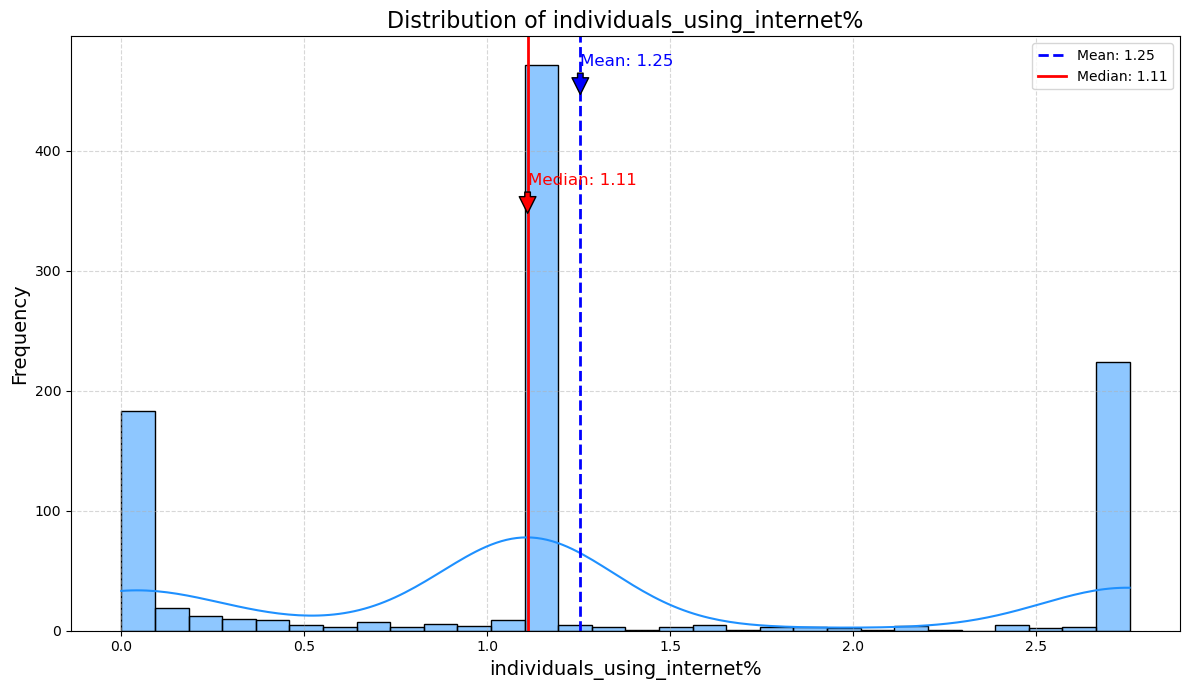

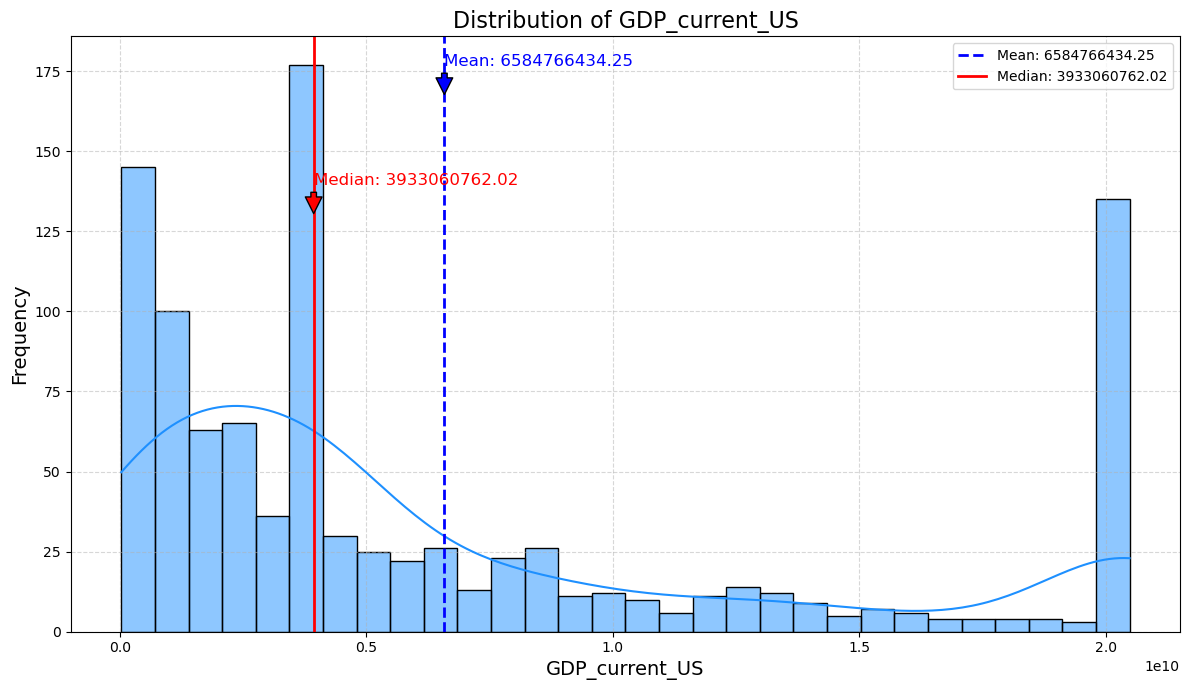

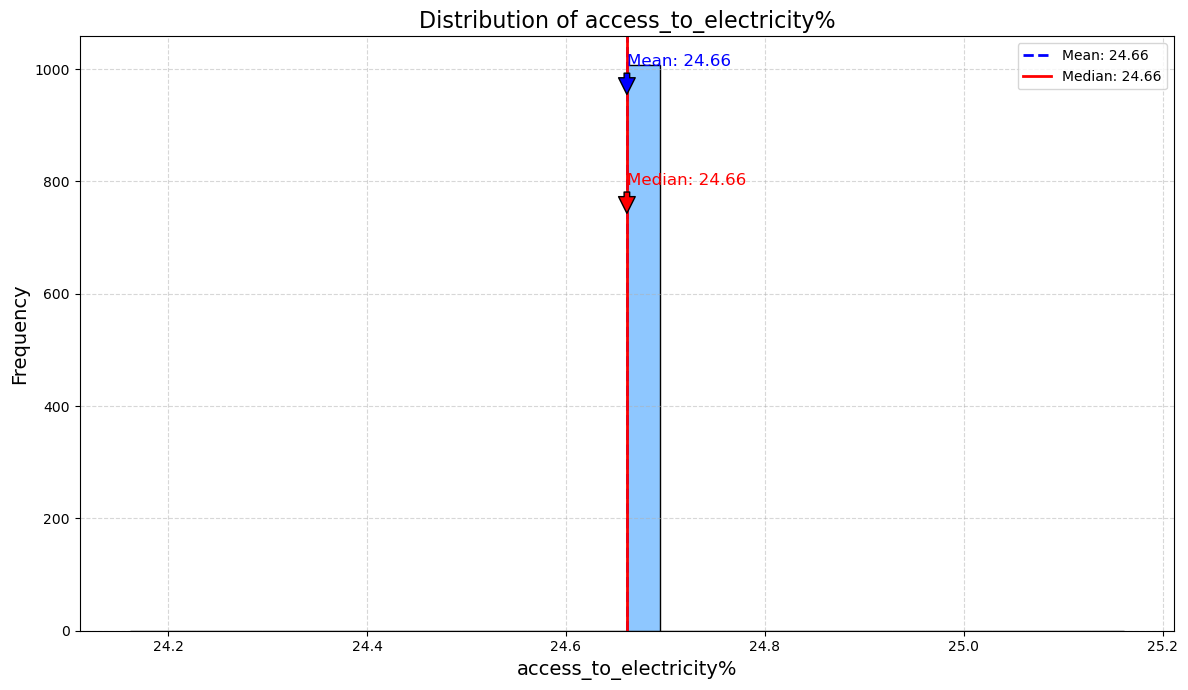

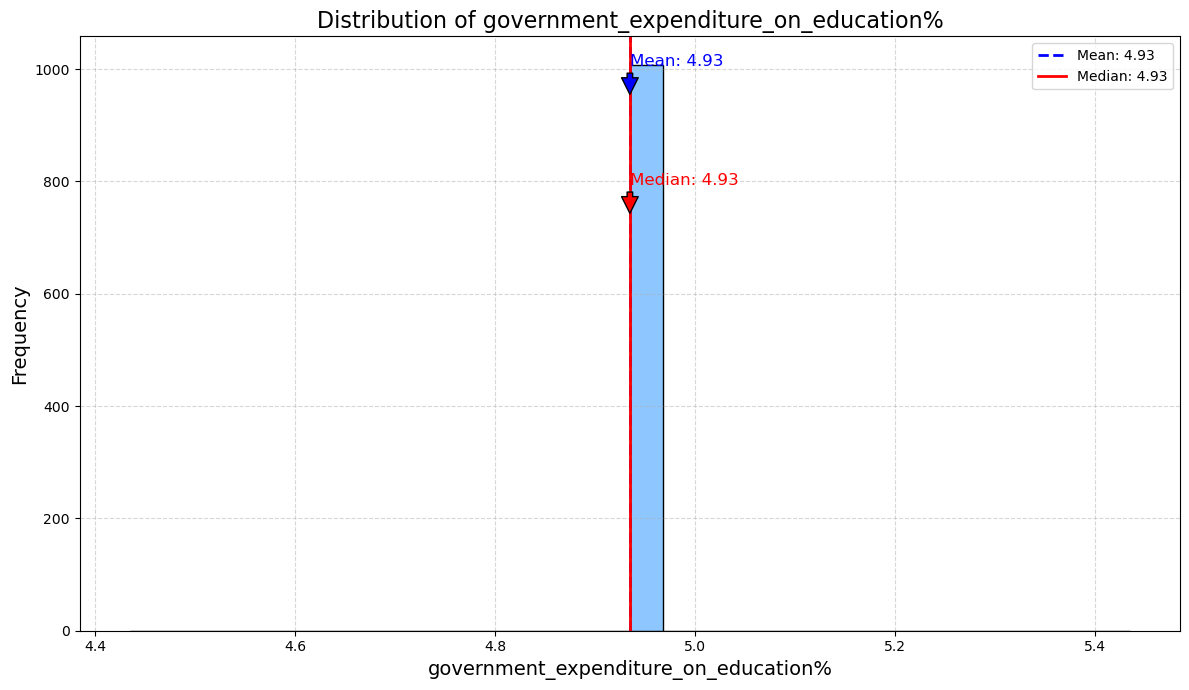

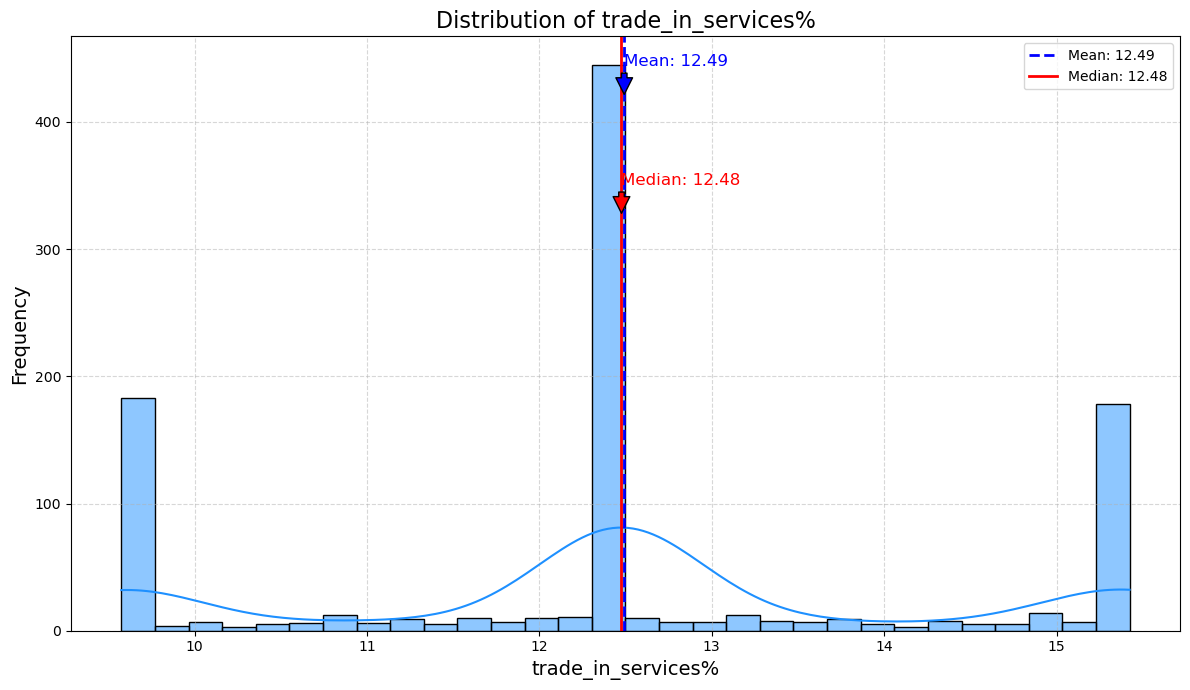

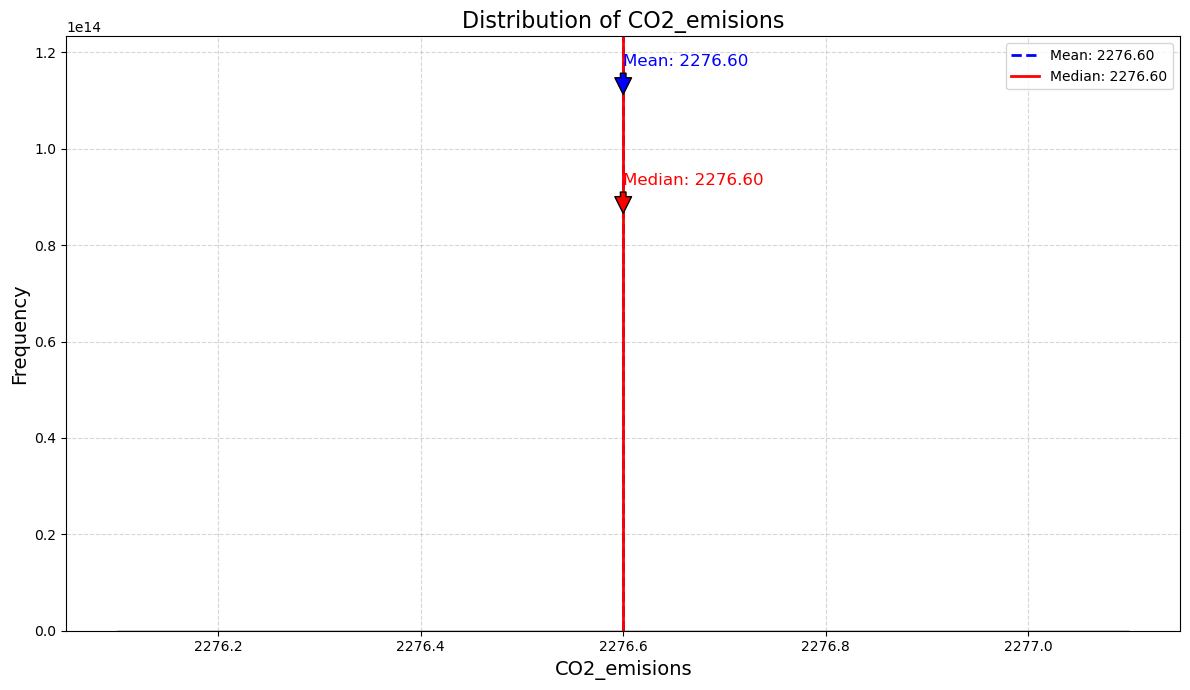

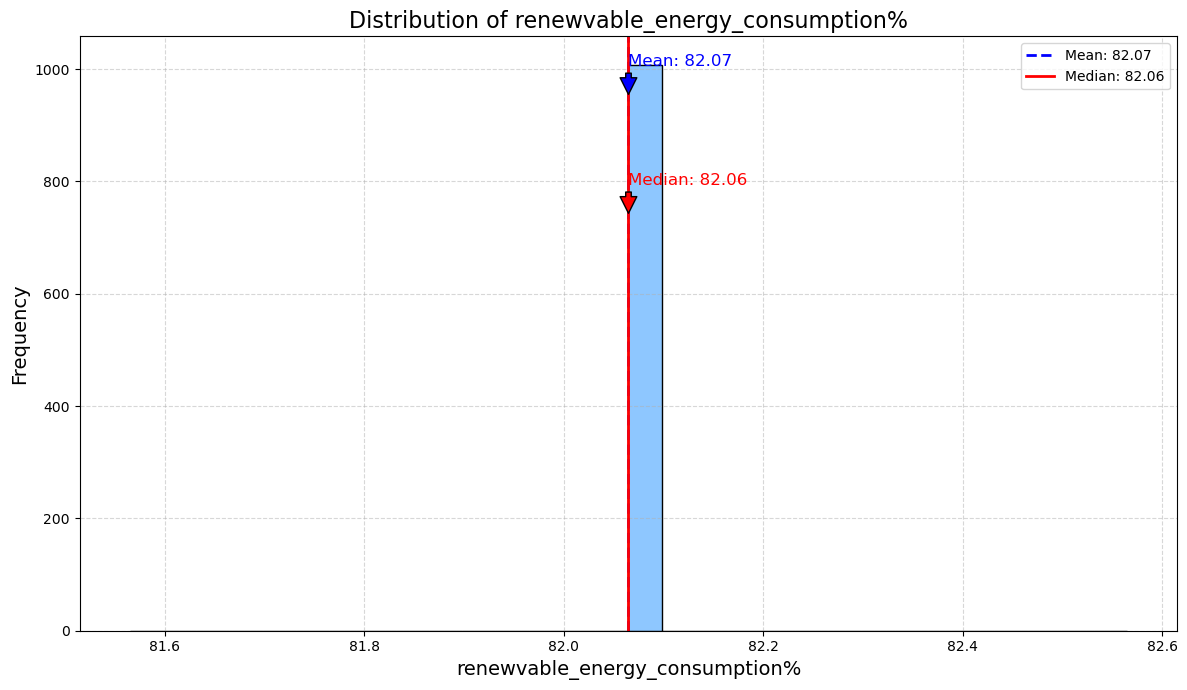

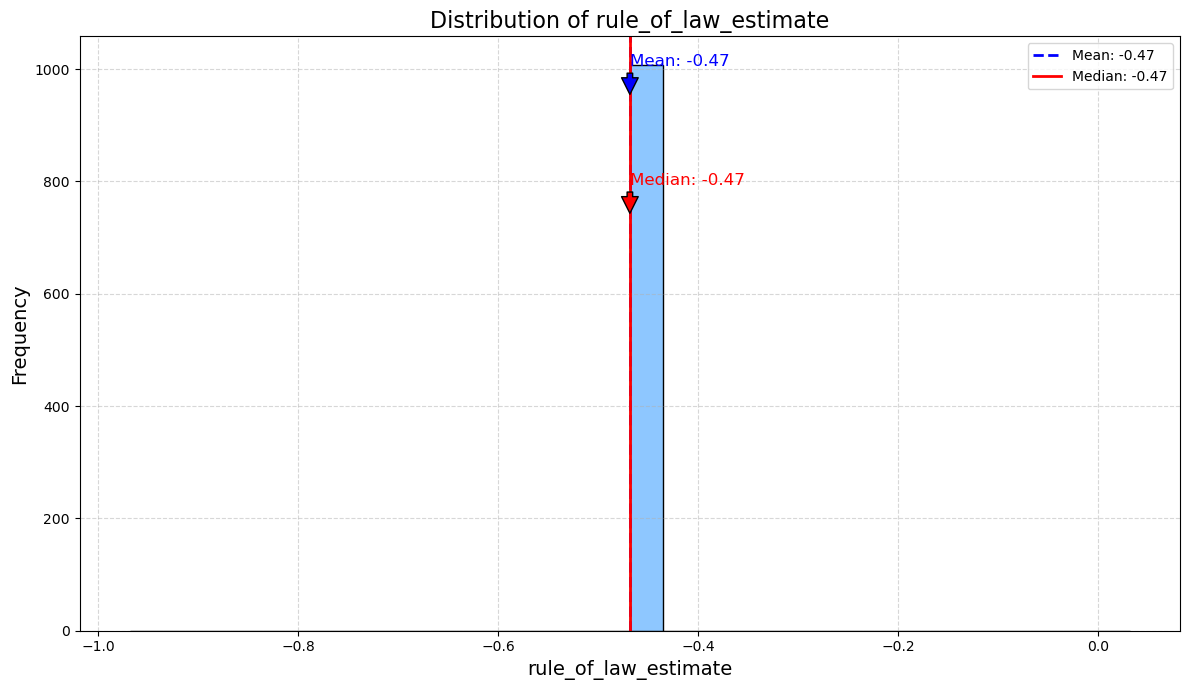

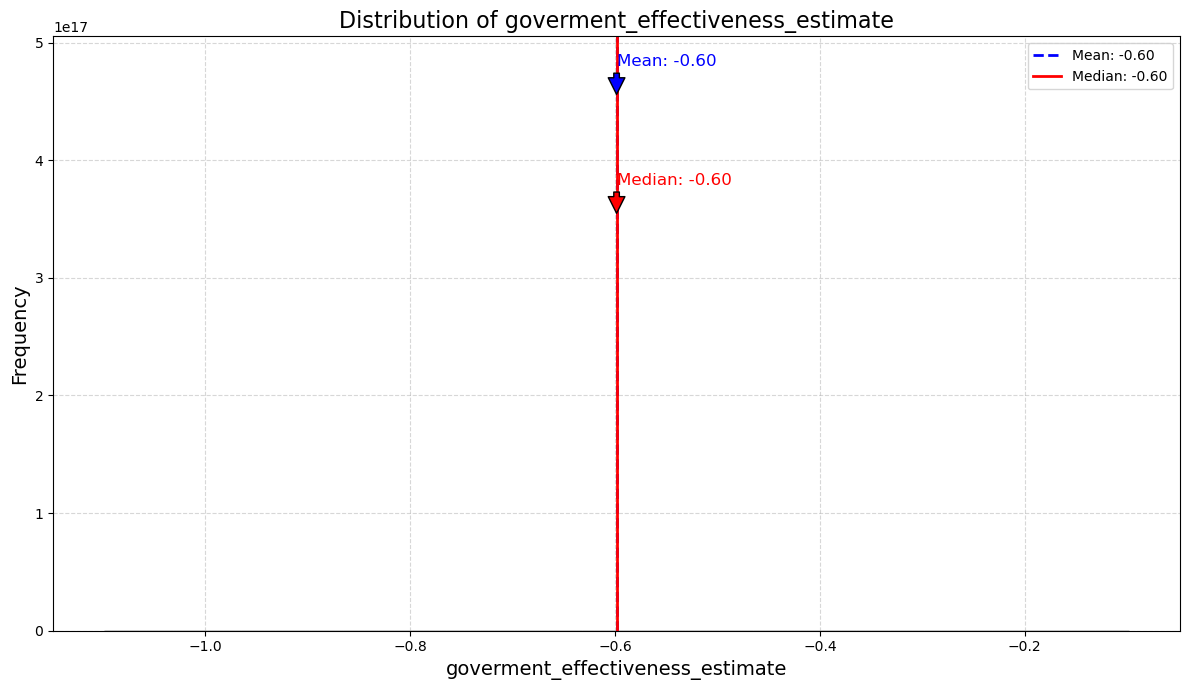

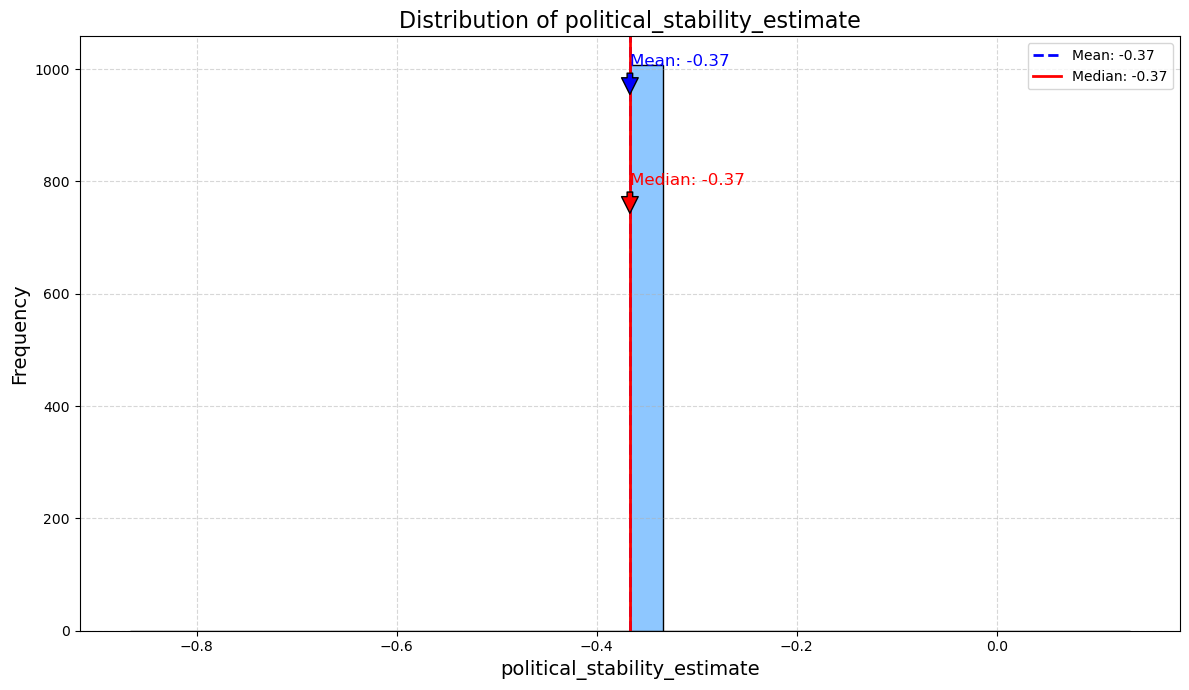

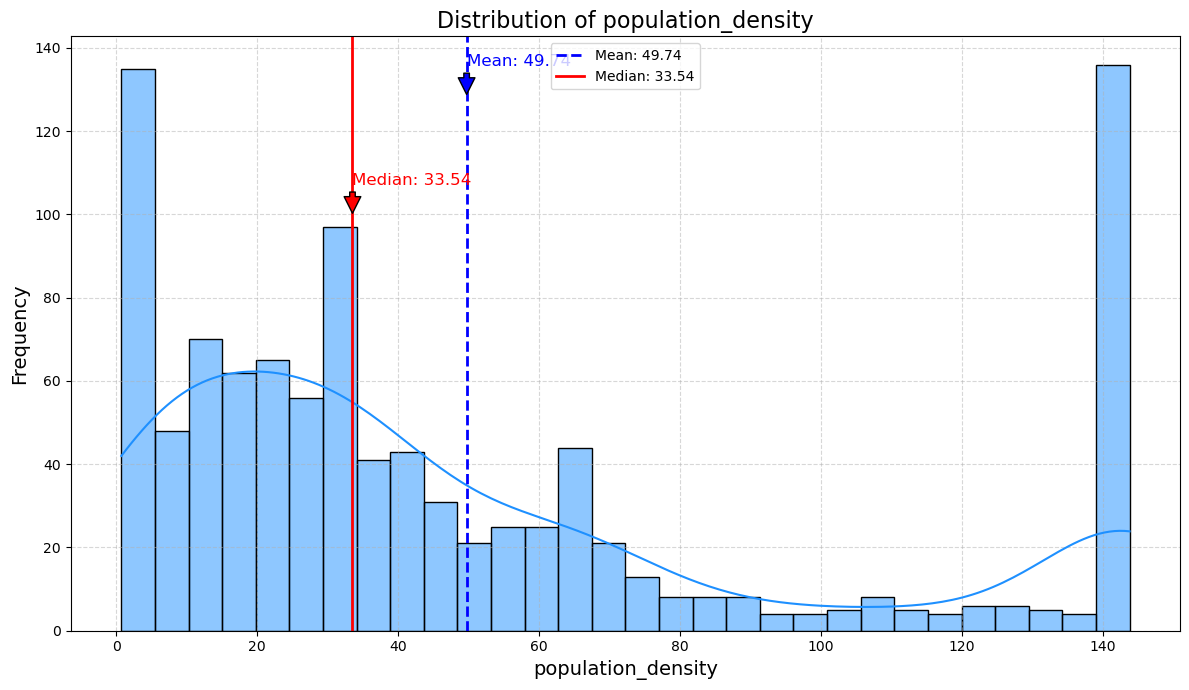

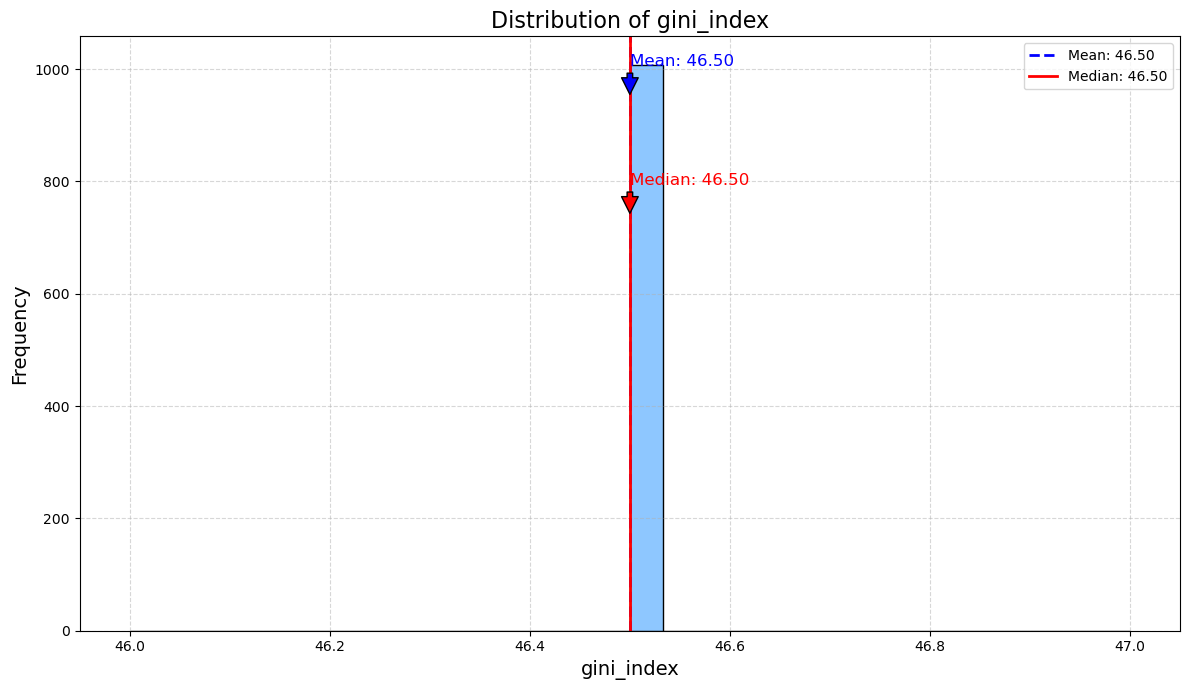

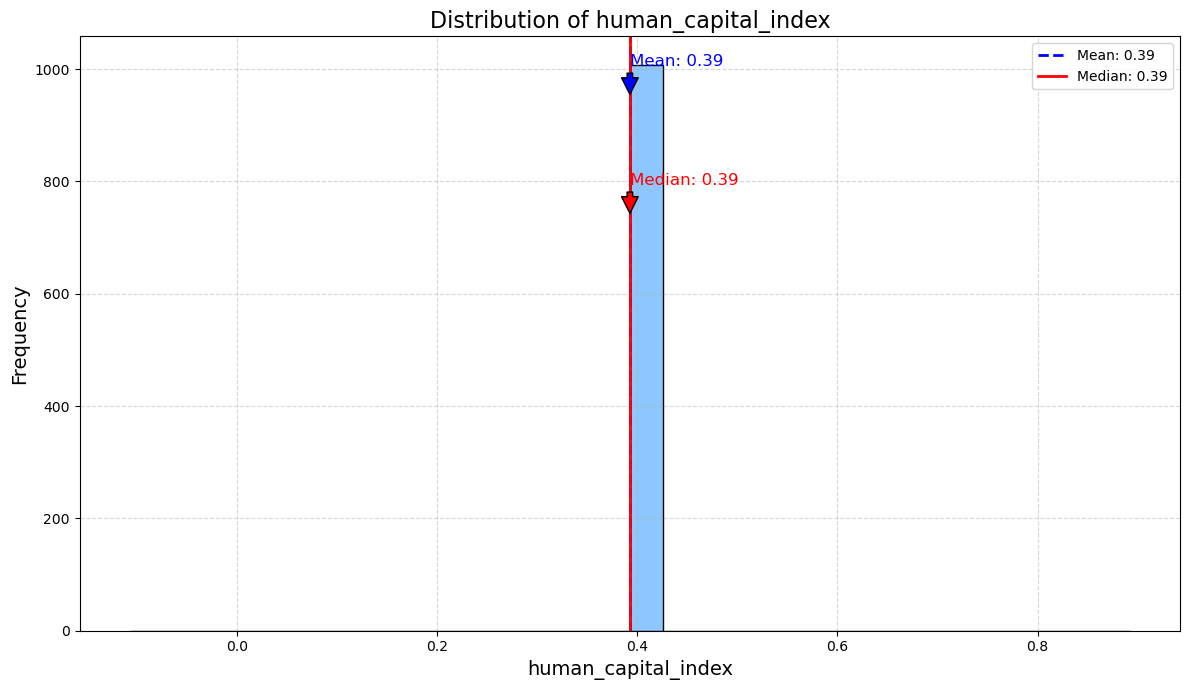

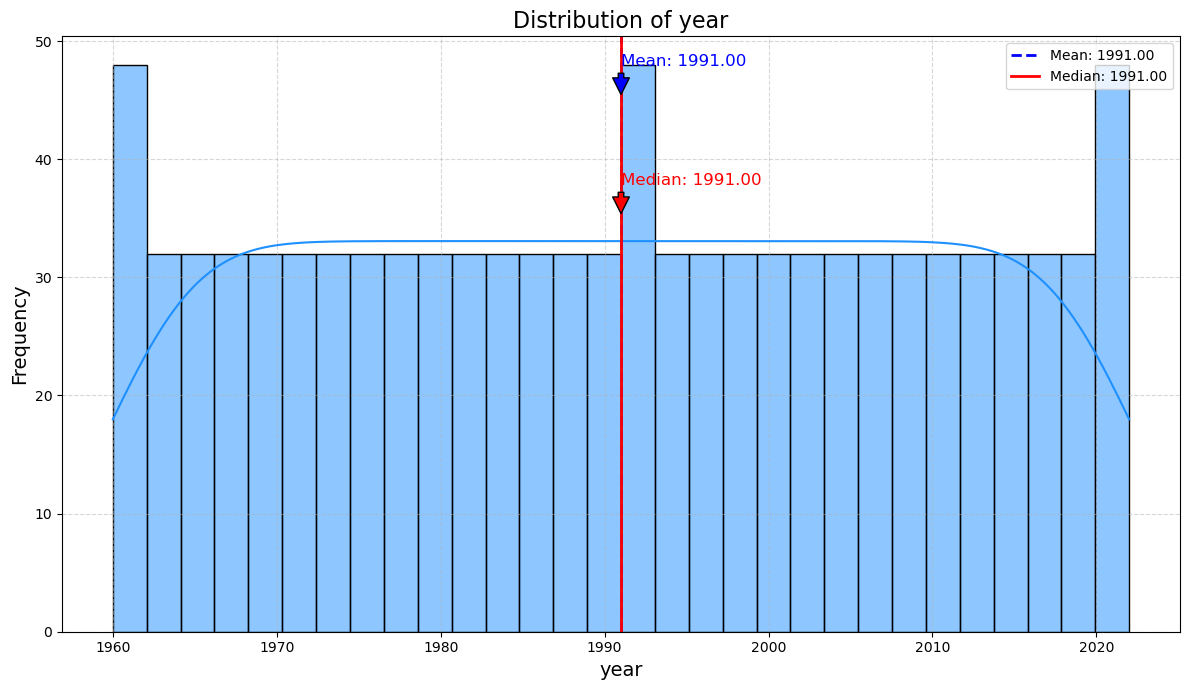

In [113]:
# Plot histograms for each column with annotation
for column in regional_data_cleaned.columns:
    if regional_data_cleaned[column].dtype in ['float64', 'int32']:
        plt.figure(figsize=(12, 7))
        sns.histplot(regional_data_cleaned[column], kde=True, color='dodgerblue', bins=30)
        
        # Calculate mean and median
        mean_value = regional_data_cleaned[column].mean()
        median_value = regional_data_cleaned[column].median()
        
        # Add mean and median lines
        plt.axvline(mean_value, color='blue', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')
        plt.axvline(median_value, color='red', linestyle='-', linewidth=2, label=f'Median: {median_value:.2f}')
        
        # Add title and labels
        plt.title(f'Distribution of {column}', fontsize=16)
        plt.xlabel(column, fontsize=14)
        plt.ylabel('Frequency', fontsize=14)
        plt.legend()
        plt.grid(visible=True, linestyle='--', alpha=0.5)
        
        # Annotate mean and median
        plt.annotate(f'Mean: {mean_value:.2f}', xy=(mean_value, plt.ylim()[1]*0.9), xytext=(mean_value, plt.ylim()[1]*0.95),
                     arrowprops=dict(facecolor='blue', shrink=0.05), fontsize=12, color='blue')
        plt.annotate(f'Median: {median_value:.2f}', xy=(median_value, plt.ylim()[1]*0.7), xytext=(median_value, plt.ylim()[1]*0.75),
                     arrowprops=dict(facecolor='red', shrink=0.05), fontsize=12, color='red')
        
        plt.tight_layout()
        plt.show()

#### **Interpretation of Graph**

The distributions for the analyzed columns reveal different insights. The internet usage data is right-skewed, showing that the majority of the population has lower internet usage with some high outliers, indicated by a mean (1.25%) slightly higher than the median (1.11%). GDP distribution is also skewed to the right, with a mean that significantly exceeds the median, reflecting the disparity in economic output across regions. Access to electricity and government expenditure on education show minimal variance, indicating a uniform spread. Trade in services displays a balanced distribution close to normal, with its mean aligning closely with the median. CO2 emissions exhibit almost no variation, suggesting uniformity in reported values. Renewable energy consumption, rule of law, government effectiveness, and political stability estimates have tightly clustered values around their means and medians, showing minimal spread and implying consistency in reporting or limited range within the data for these variables.

The distributions show various characteristics of key indicators. The distribution of population density indicates a skew with a mean higher than the median, showing the presence of higher density outliers. The Gini index and human capital index distributions are narrowly centered with nearly identical means and medians, suggesting low variability. The year distribution demonstrates a consistent spread, peaking at 1991. Overall, these visualizations suggest diverse characteristics across different variables, indicating varying degrees of central tendency and dispersion, which will affect further data analyses.

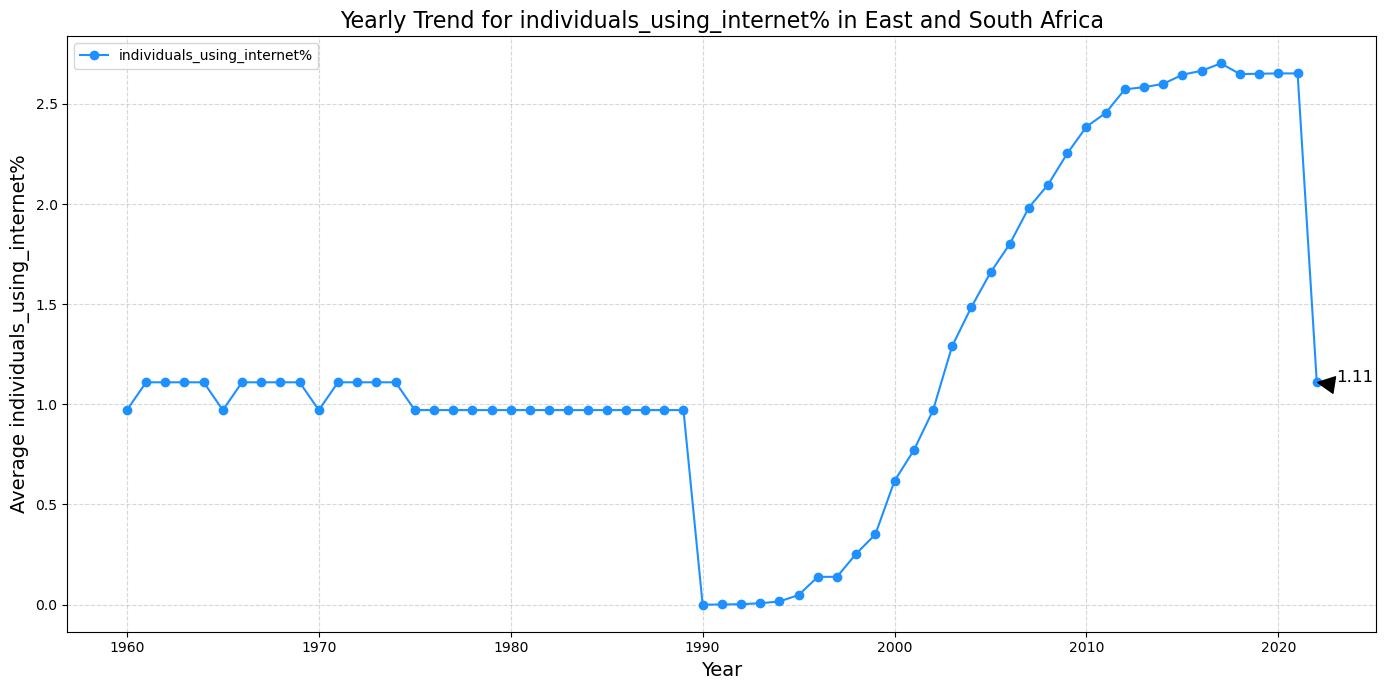

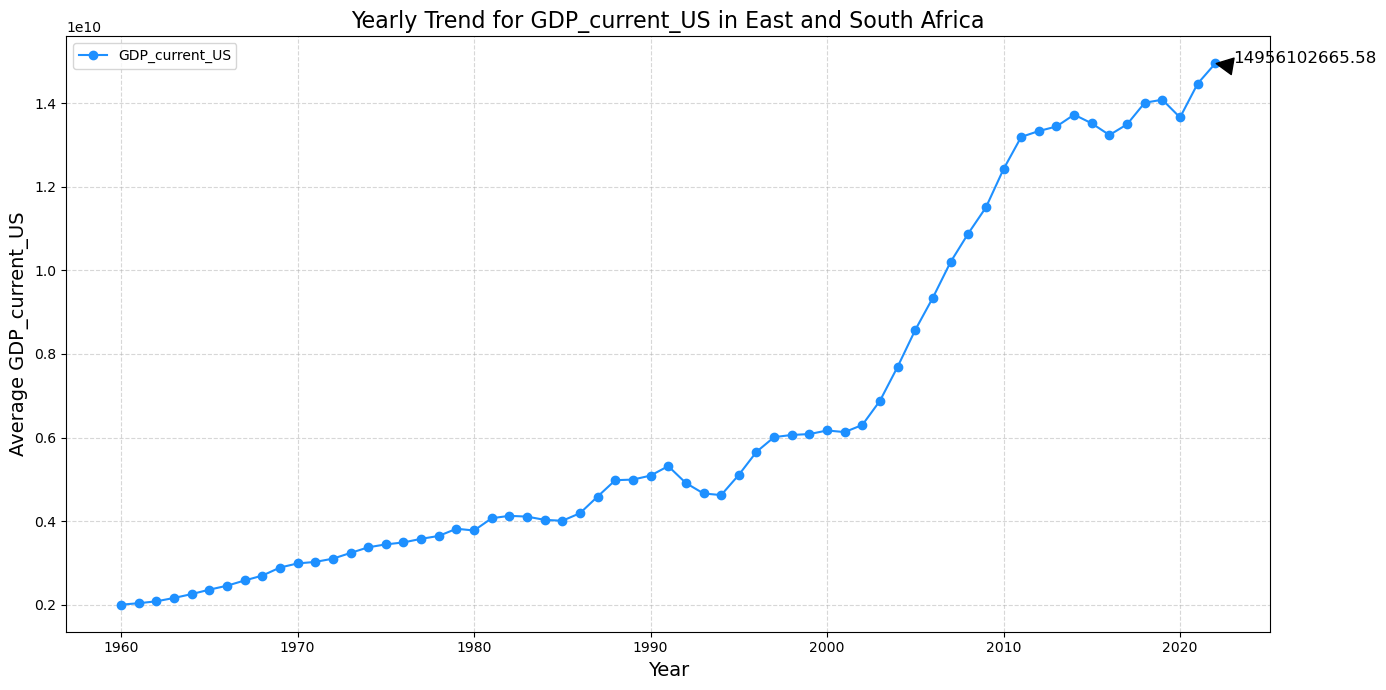

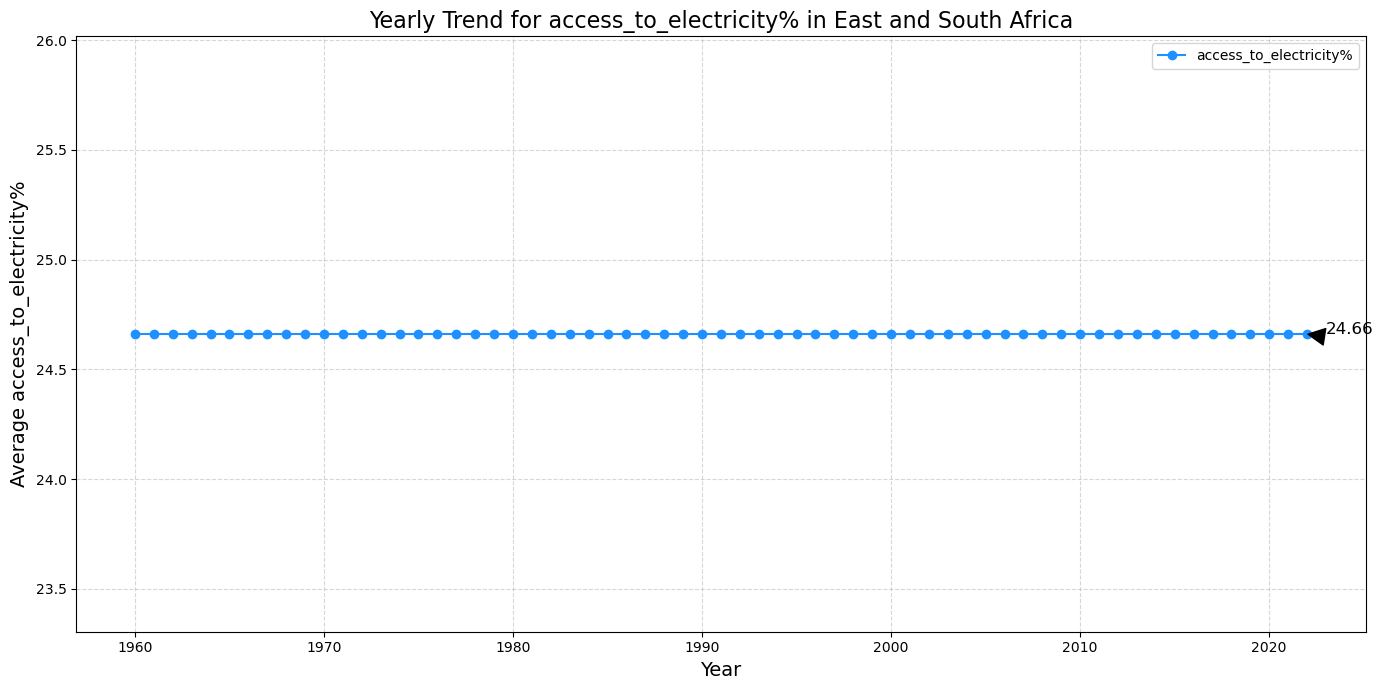

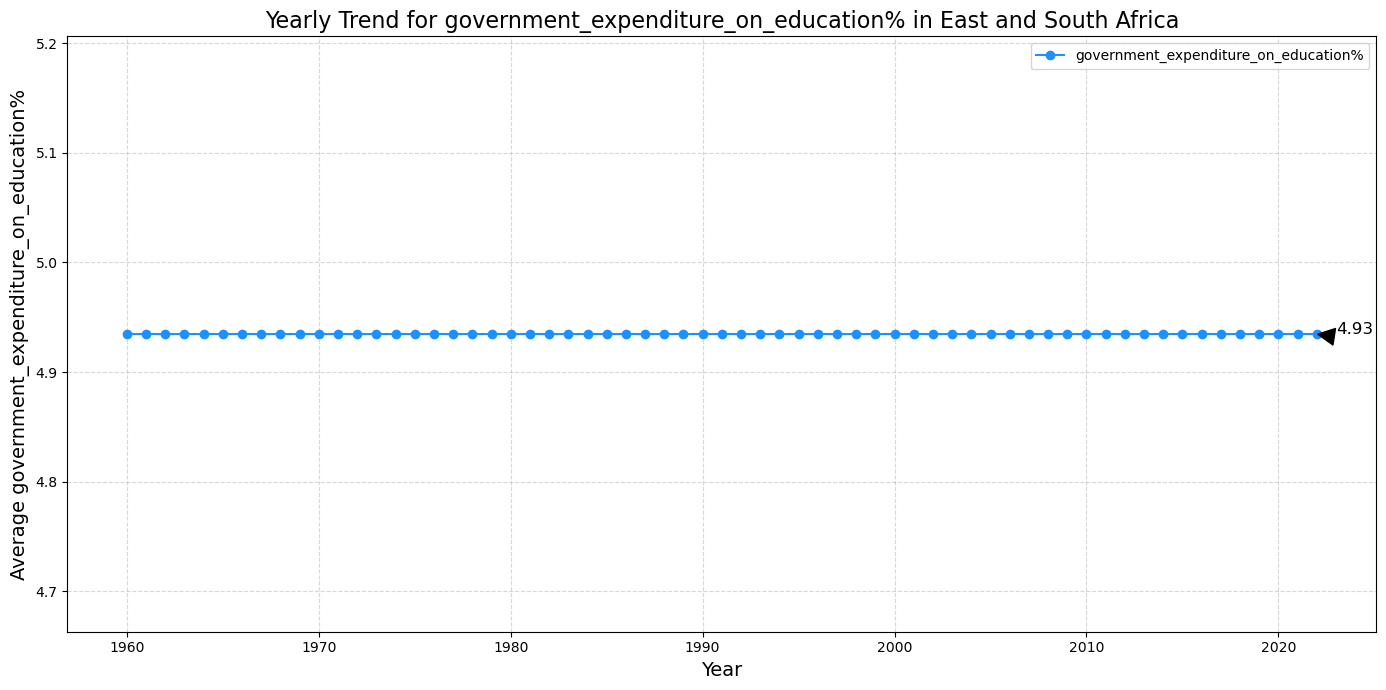

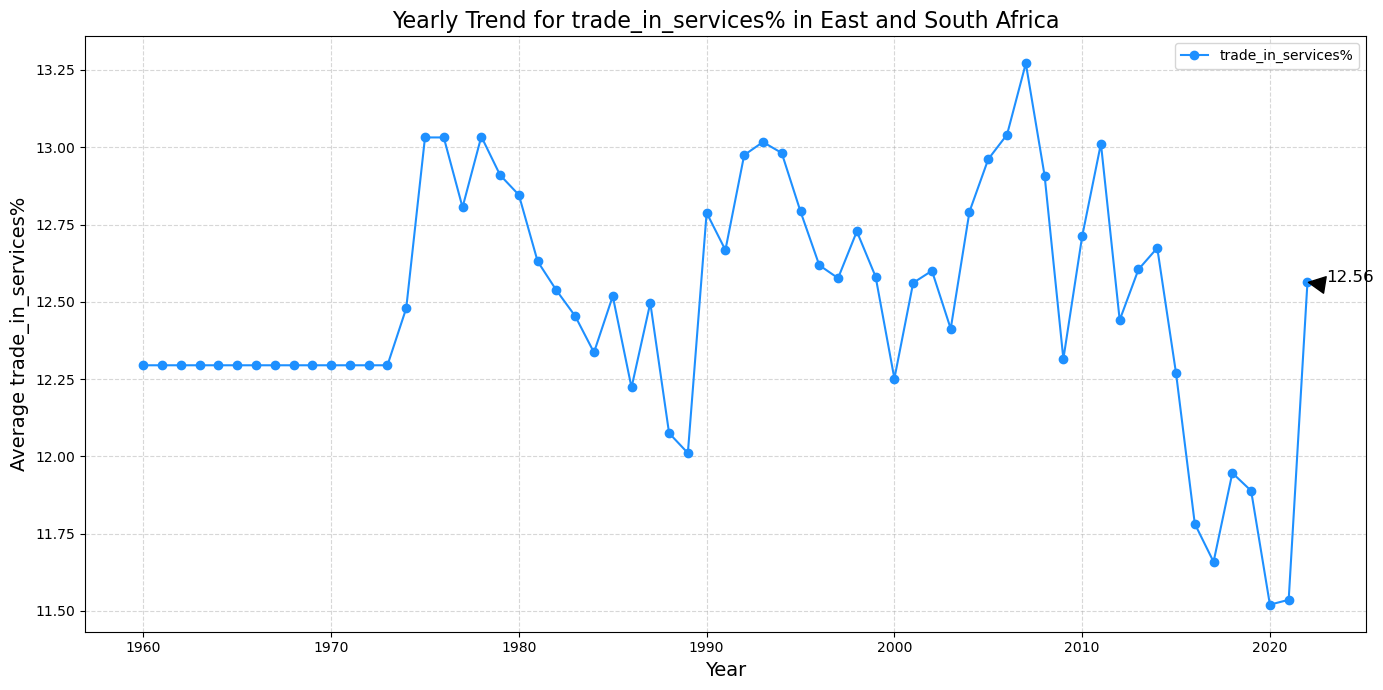

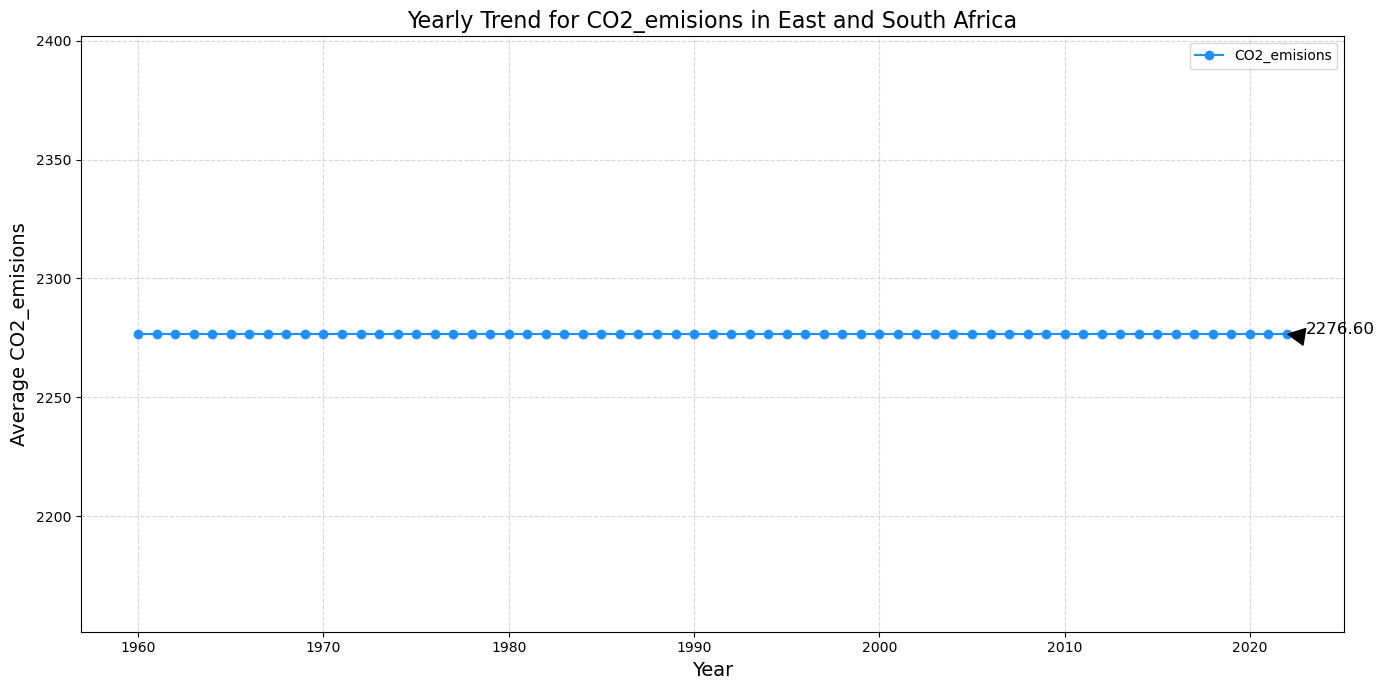

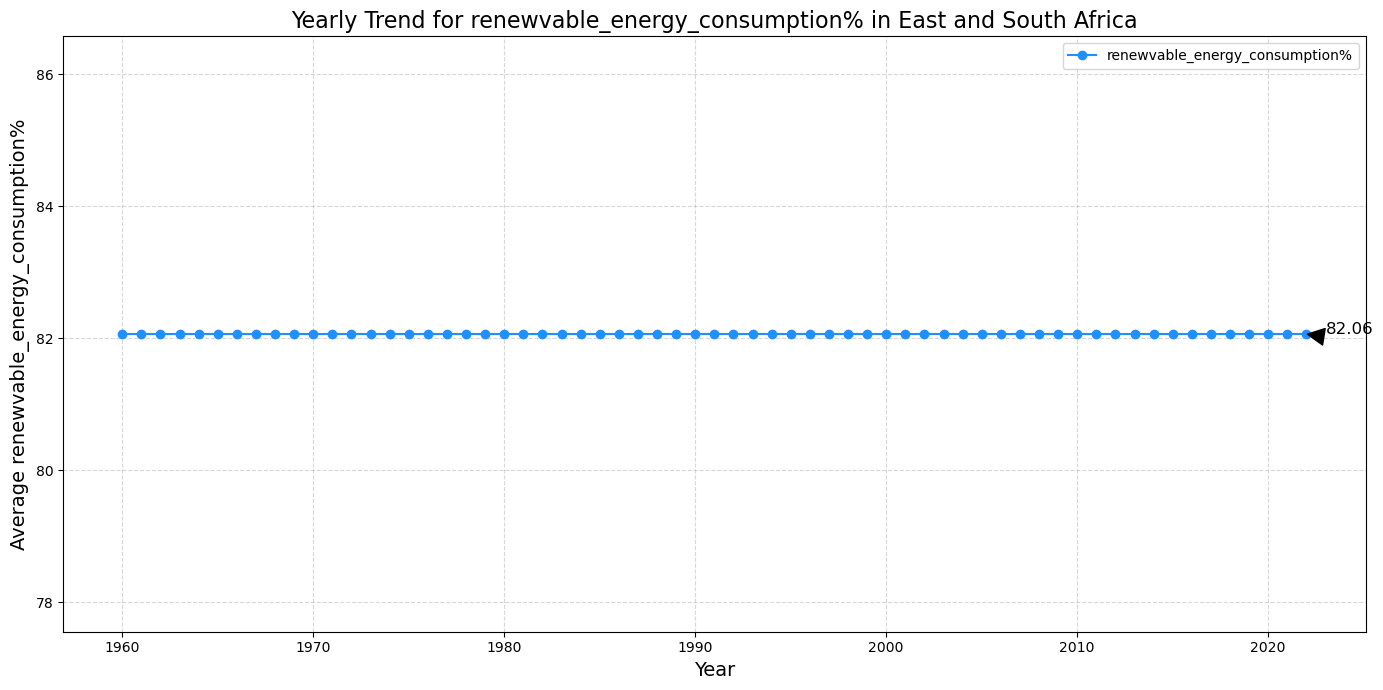

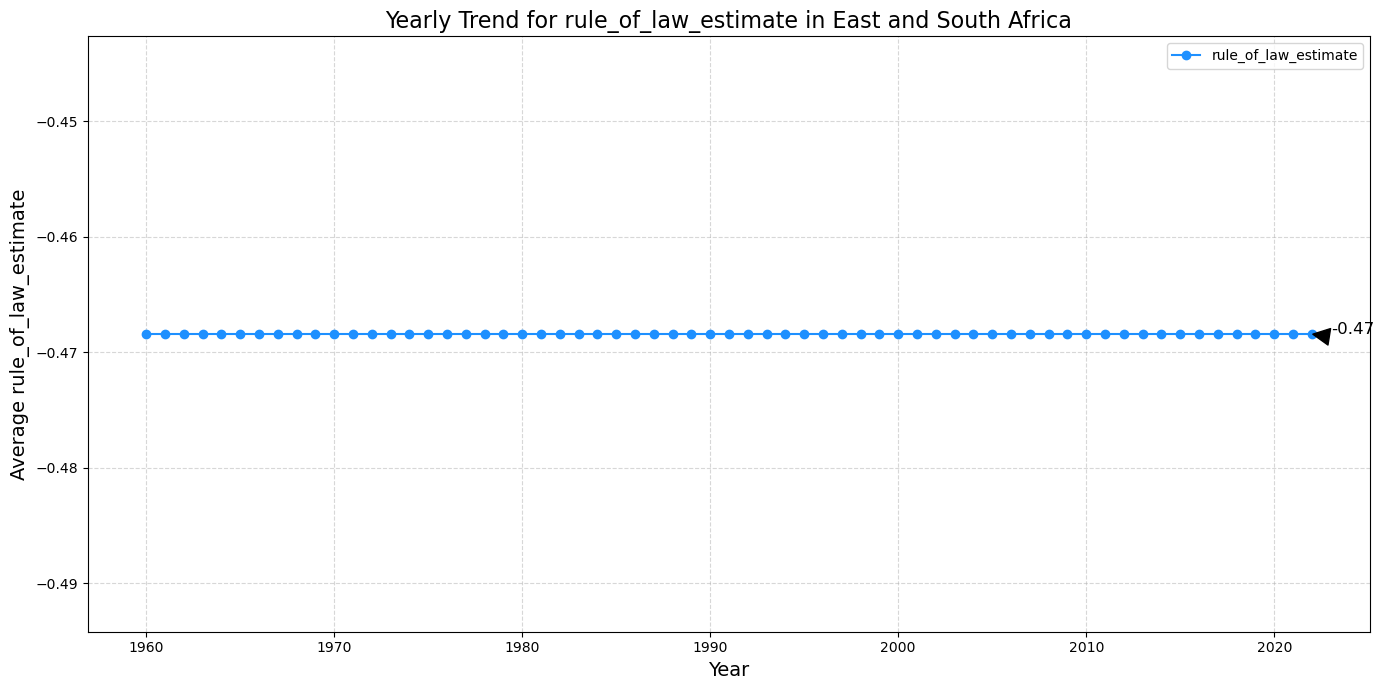

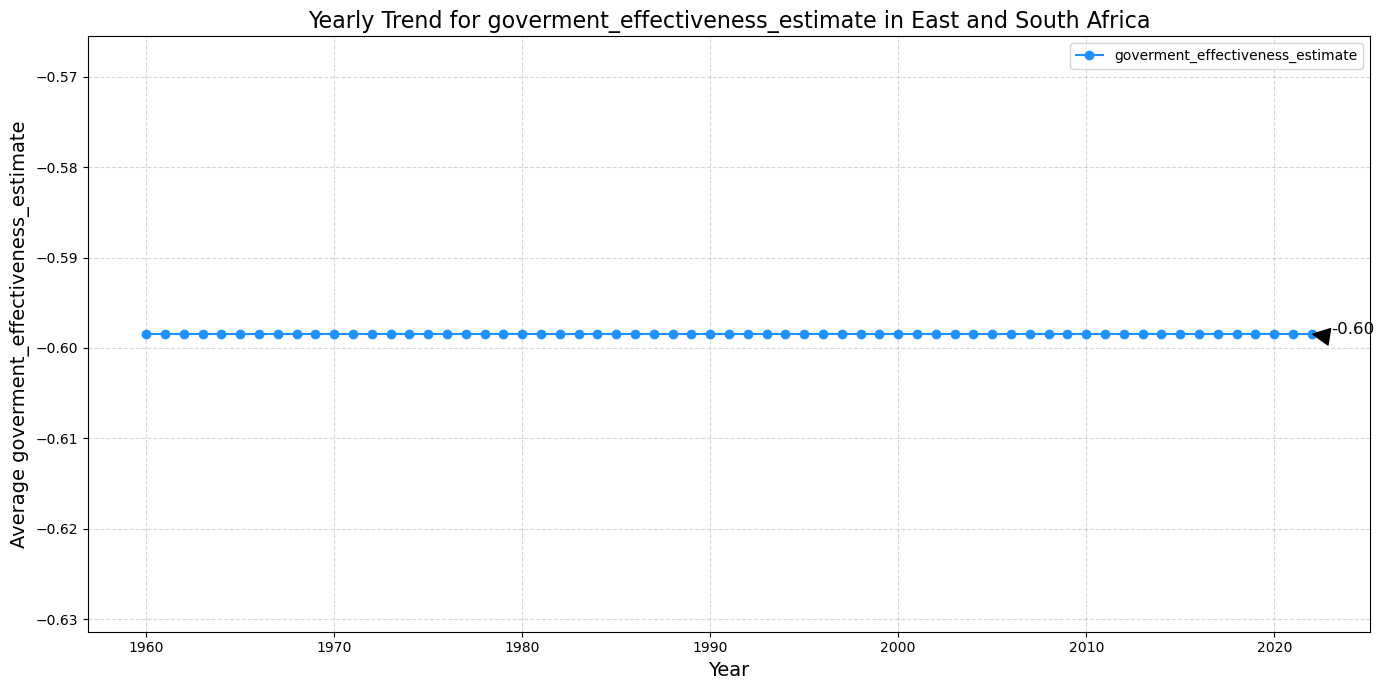

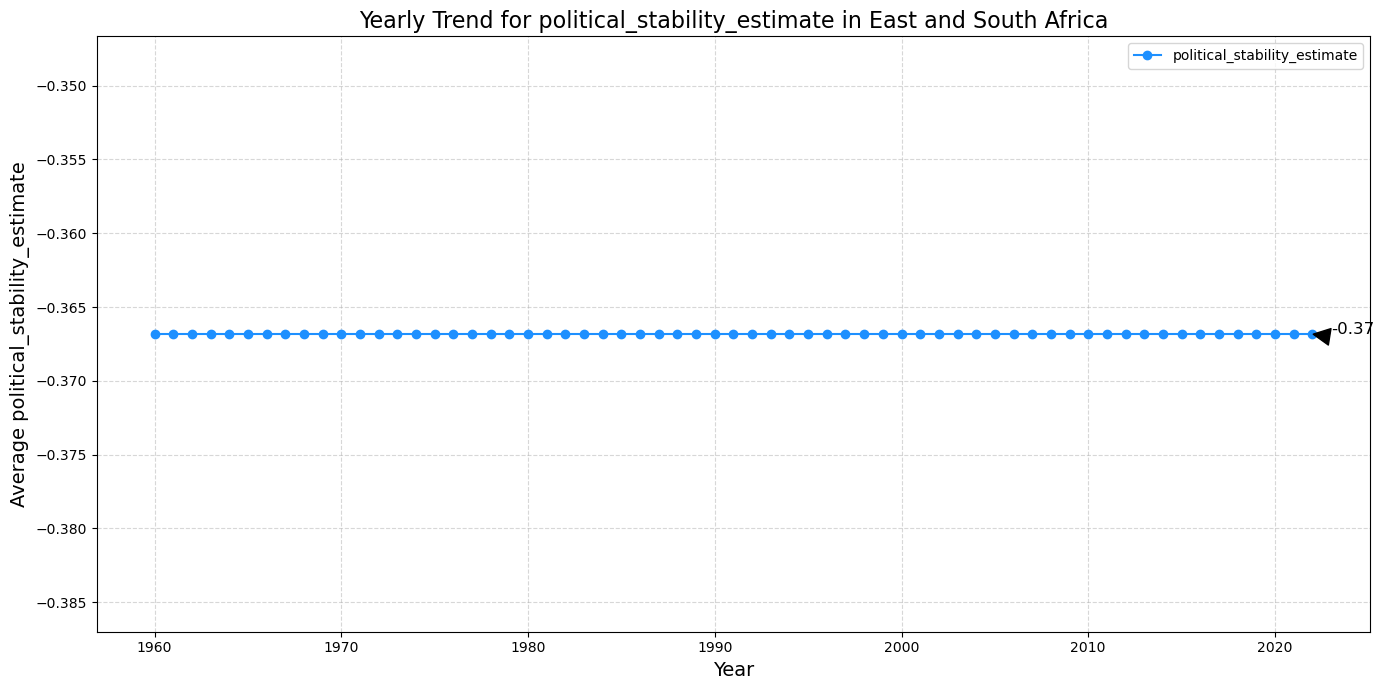

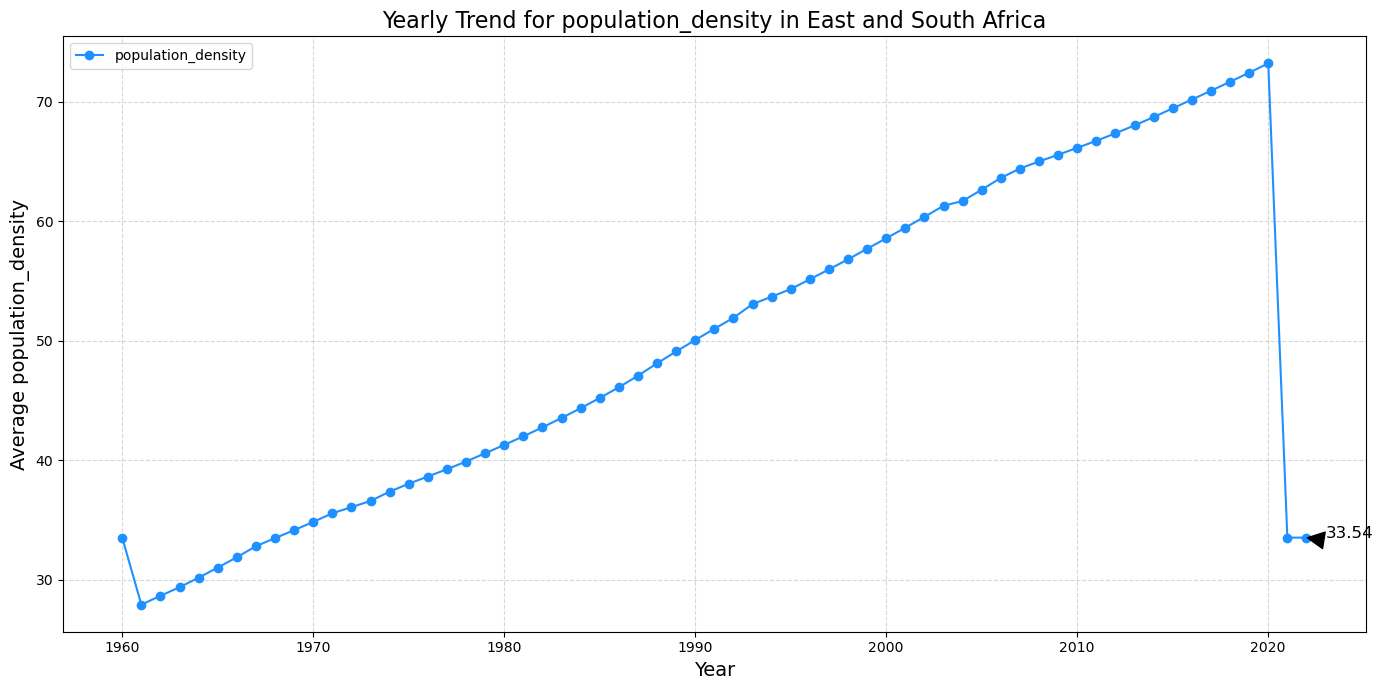

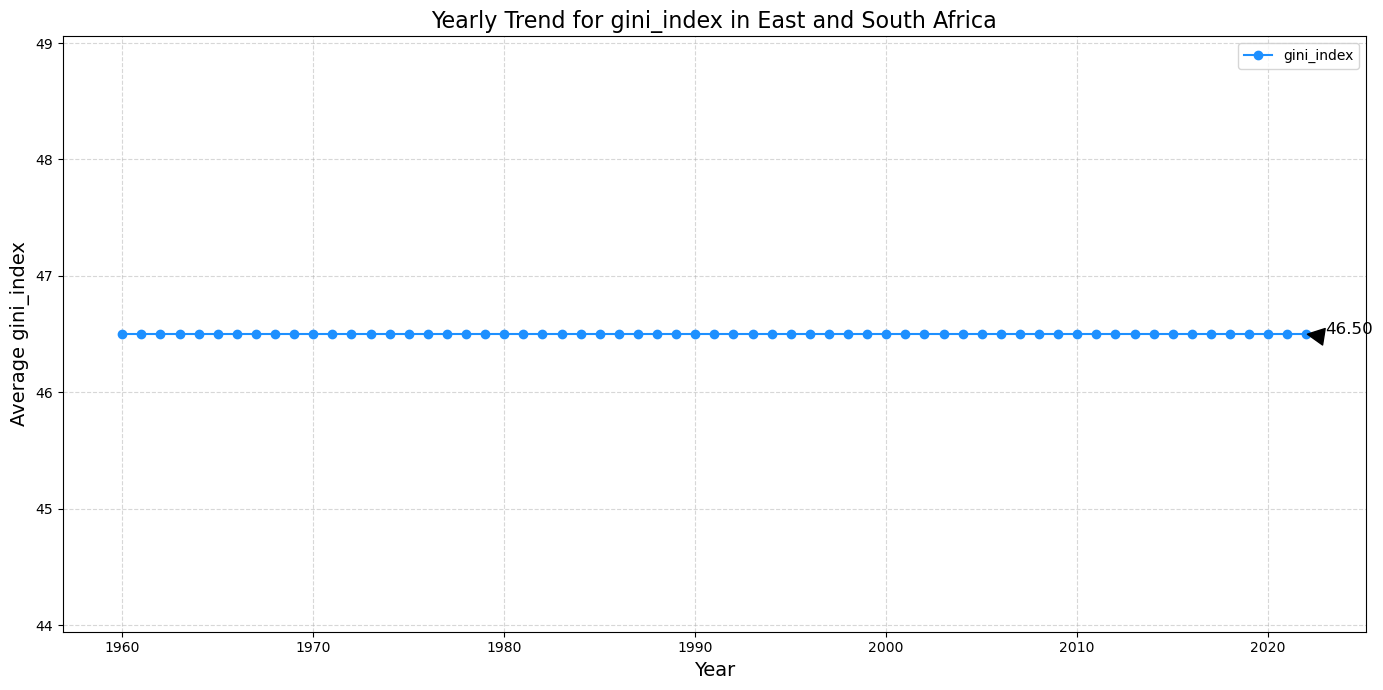

In [114]:
# Plot the trends for each column individually with annotation
for column in yearly_trends.columns:
    plt.figure(figsize=(14, 7))
    plt.plot(yearly_trends.index, yearly_trends[column], marker='o', linestyle='-', label=column, color='dodgerblue')
    plt.title(f'Yearly Trend for {column} in East and South Africa', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel(f'Average {column}', fontsize=14)
    plt.grid(visible=True, linestyle='--', alpha=0.5)
    plt.legend()
    
    # Annotate the last point with its value
    last_value = yearly_trends[column].iloc[-1]
    plt.annotate(f'{last_value:.2f}', xy=(yearly_trends.index[-1], last_value), 
                 xytext=(yearly_trends.index[-1] + 1, last_value),
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 fontsize=12, color='black')
    
    plt.tight_layout()
    plt.show()


#### **Interpretation of Graph**

The graphs collectively depict trends in various socioeconomic indicators in East and South Africa. Internet usage saw minimal growth until around 2000, followed by significant increases, peaking around 2020 before a sharp drop. GDP growth displayed a steady rise over time, reaching over $14 billion by 2020. The percentage of trade in services fluctuated but remained around 12-13%. Population density increased consistently, while access to electricity and renewable energy consumption stayed stable. Government expenditure on education and CO2 emissions also showed little change, indicating limited shifts in public investment and environmental impact. Both governance indicators, rule of law and government effectiveness, stayed constant, reflecting consistent political conditions.

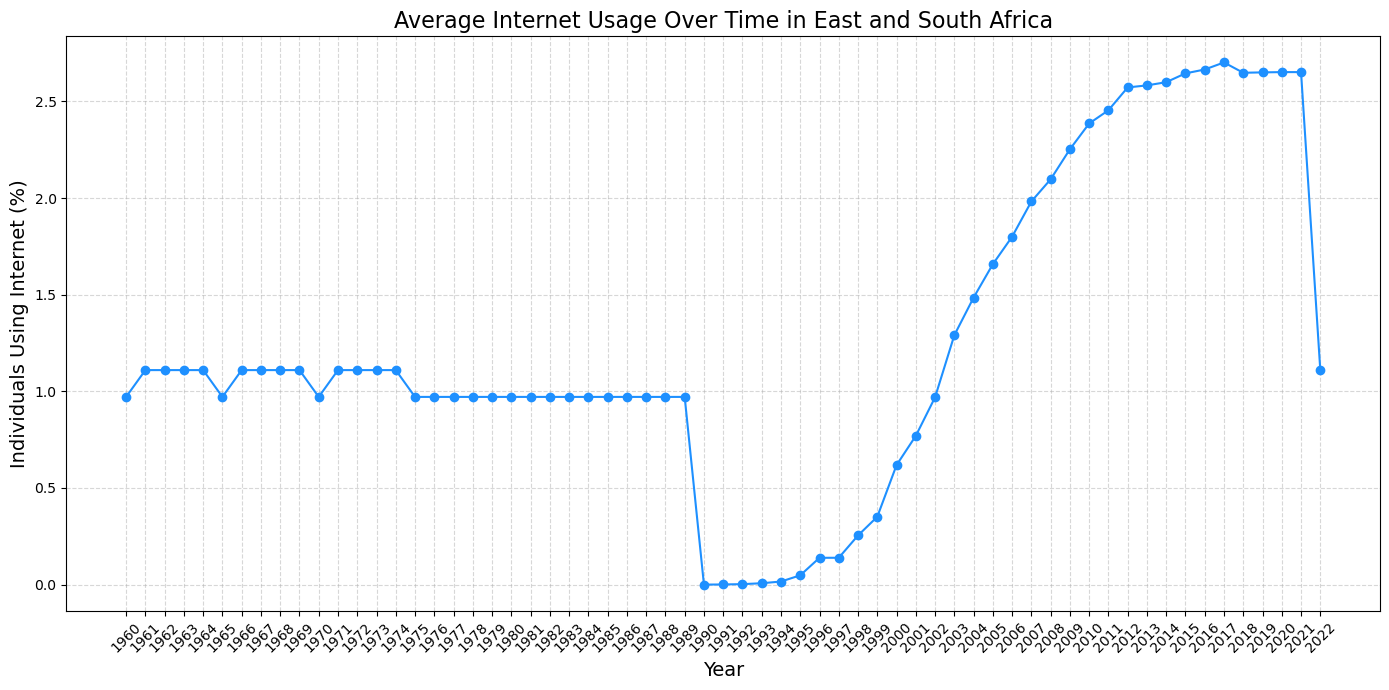

In [64]:
# Calculate the average internet usage per year
internet_trend = regional_data_cleaned.groupby('year')['individuals_using_internet%'].mean()

# 1. Internet usage trends over two decades
plt.figure(figsize=(14, 7))
plt.plot(internet_trend.index, internet_trend.values, marker='o', linestyle='-', color='dodgerblue')
plt.title('Average Internet Usage Over Time in East and South Africa', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Individuals Using Internet (%)', fontsize=14)
plt.xticks(internet_trend.index, rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

The graph shows the trend of average internet usage in East and South Africa over time. Internet usage remained below 2% from 1960 to around 1990, then experienced a significant increase starting in the late 1990s, peaking after 2010. However, there was a sharp decline after 2020.

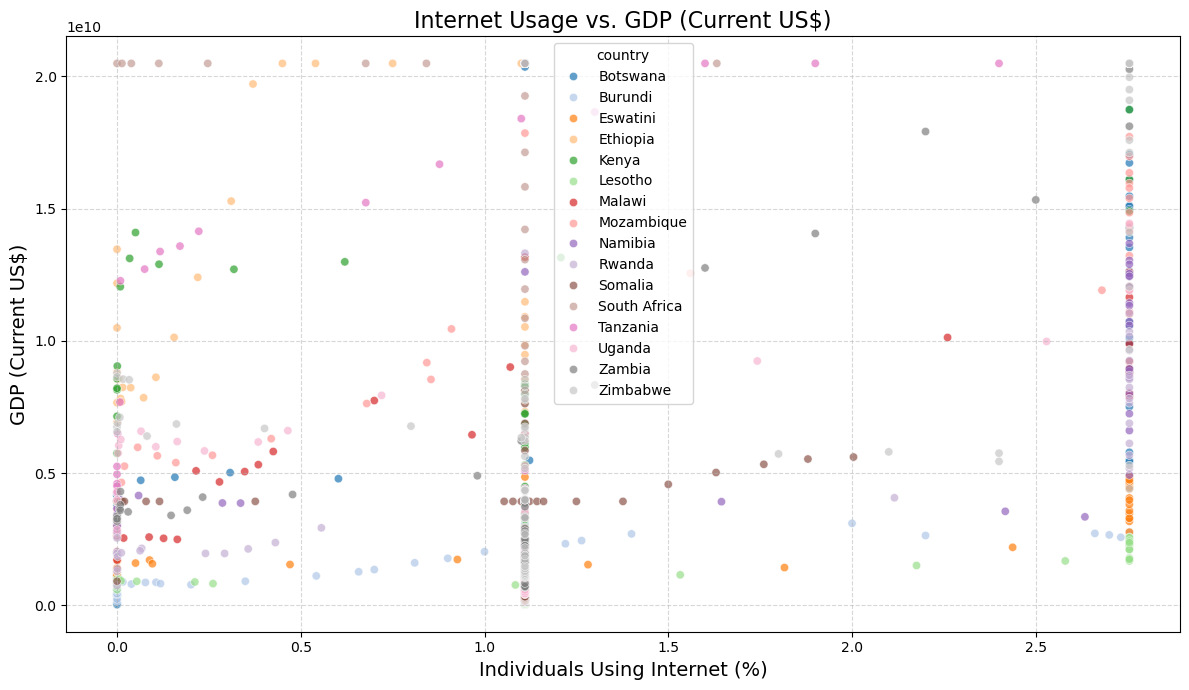

In [65]:
# 2. Correlation between internet usage and GDP
plt.figure(figsize=(12, 7))
sns.scatterplot(data=regional_data_cleaned, x='individuals_using_internet%', y='GDP_current_US', hue='country', alpha=0.7, palette='tab20')
plt.title('Internet Usage vs. GDP (Current US$)', fontsize=16)
plt.xlabel('Individuals Using Internet (%)', fontsize=14)
plt.ylabel('GDP (Current US$)', fontsize=14)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

The scatter plot illustrates the relationship between internet usage (% of individuals) and GDP (in current US$) across various countries in East and South Africa. Most data points cluster at low levels of internet usage and GDP, indicating limited connectivity and economic size. A few outliers show higher GDP with low to moderate internet usage, suggesting economic disparities within the region.

Countries with the most significant improvement in GDP with increasing internet penetration:
       country  correlation
14      Zambia     0.822921
7   Mozambique     0.773257
13      Uganda     0.760292
0     Botswana     0.754411
8      Namibia     0.746184
2     Eswatini     0.731301
6       Malawi     0.715252
9       Rwanda     0.706007
5      Lesotho     0.695586
4        Kenya     0.669503


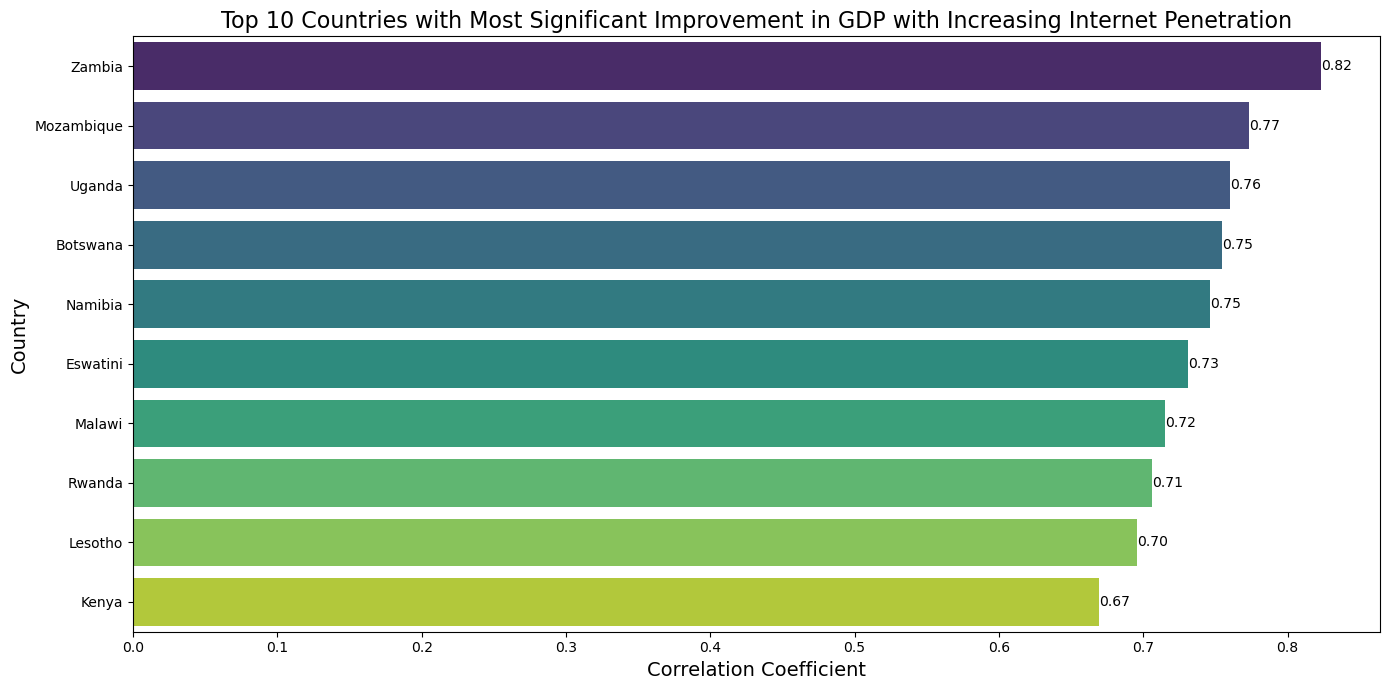

In [68]:
# 3. Which countries have shown the most significant improvement in GDP with increasing internet penetration?

# Calculate the correlation between internet usage and GDP for each country
country_gdp_internet_corr = regional_data_cleaned.groupby('country').apply(
    lambda x: x['individuals_using_internet%'].corr(x['GDP_current_US'])
).reset_index(name='correlation')

# Sort the countries by the correlation in descending order
country_gdp_internet_corr = country_gdp_internet_corr.sort_values(by='correlation', ascending=False)

# Display the top countries with the highest correlation
print("Countries with the most significant improvement in GDP with increasing internet penetration:")
print(country_gdp_internet_corr.head(10)) 

# Visualize the correlation between internet usage and GDP for each country with annotation
plt.figure(figsize=(14, 7))
sns.barplot(data=country_gdp_internet_corr.head(10), x='correlation', y='country', palette='viridis')
plt.title('Top 10 Countries with Most Significant Improvement in GDP with Increasing Internet Penetration', fontsize=16)
plt.xlabel('Correlation Coefficient', fontsize=14)
plt.ylabel('Country', fontsize=14)

# Annotate the bars with the correlation values
for index, value in enumerate(country_gdp_internet_corr['correlation'].head(10)):
    plt.text(value, index, f'{value:.2f}', color='black', ha="left", va="center")

plt.tight_layout()
plt.show()


The bar chart shows the top 10 countries in East and South Africa with the highest correlation between GDP growth and increased internet penetration. Zambia has the strongest correlation at 0.82, followed by Mozambique and Uganda with 0.77 and 0.76, respectively. Other countries on the list include Botswana, Namibia, Eswatini, Malawi, Rwanda, Lesotho, and Kenya, indicating that these nations have seen significant GDP improvements associated with higher internet usage.

Correlation between access to electricity and internet usage: 0.00


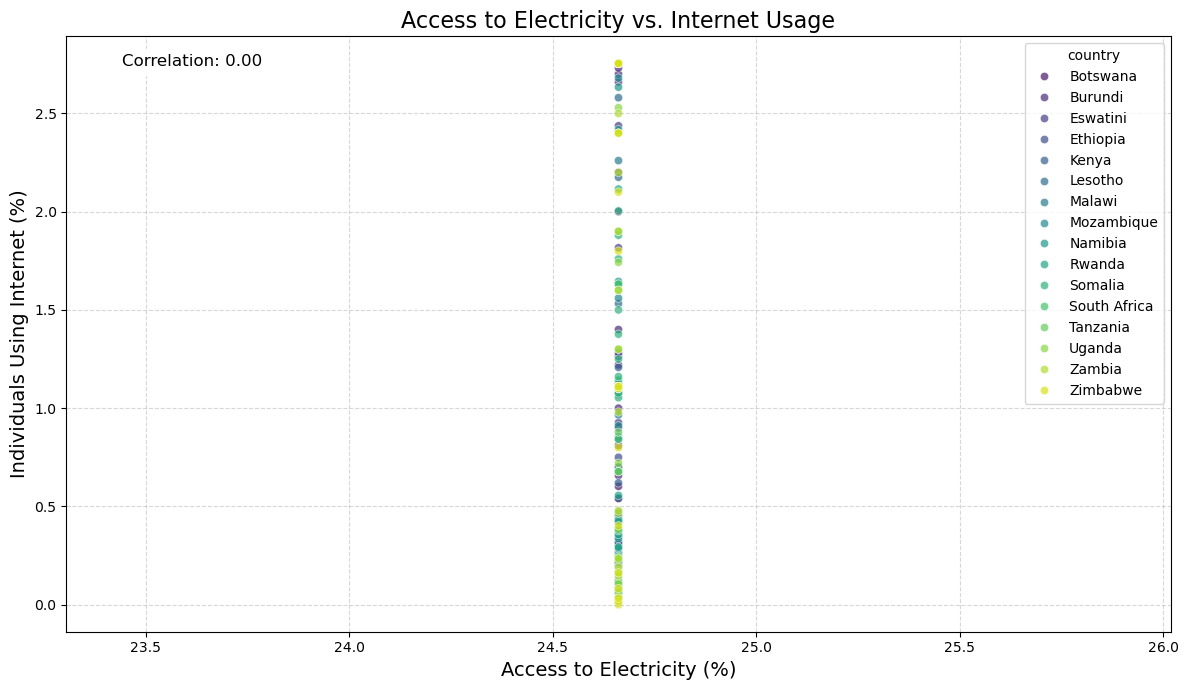

In [72]:
# 4. How does access to electricity correlate with internet usage, and what are the implications for infrastructure?
correlation = regional_data_cleaned['access_to_electricity%'].corr(regional_data_cleaned['individuals_using_internet%'])
print(f"Correlation between access to electricity and internet usage: {correlation:.2f}")

plt.figure(figsize=(12, 7))
sns.scatterplot(data=regional_data_cleaned, x='access_to_electricity%', y='individuals_using_internet%', hue='country', alpha=0.7, palette='viridis')
plt.title('Access to Electricity vs. Internet Usage', fontsize=16)
plt.xlabel('Access to Electricity (%)', fontsize=14)
plt.ylabel('Individuals Using Internet (%)', fontsize=14)
plt.grid(visible=True, linestyle='--', alpha=0.5)

# Annotate the correlation on the plot
plt.annotate(f'Correlation: {correlation:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='black', backgroundcolor='white')

plt.tight_layout()
plt.show()

The scatter plot shows the relationship between access to electricity and internet usage across various East and South African countries. The correlation coefficient is 0.00, indicating no significant relationship between the two variables. Each point represents a country, with all data clustered around the same range for electricity access, suggesting that variations in electricity access do not correlate with differences in internet usage. 

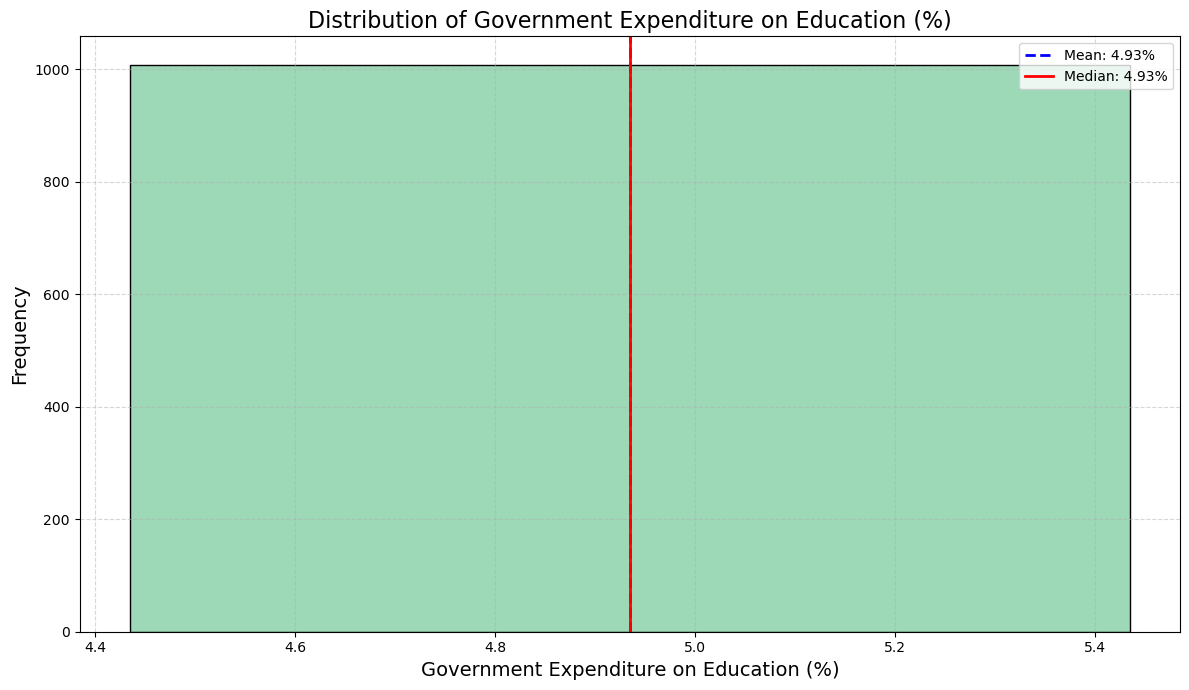

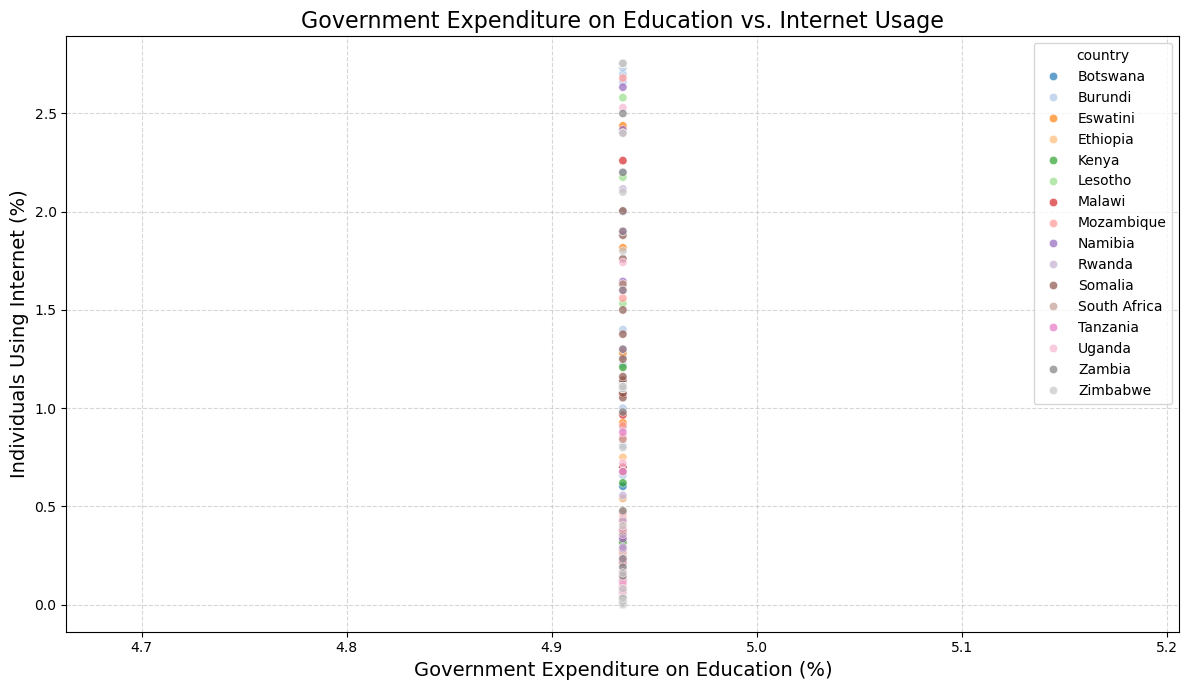

In [139]:
# 5. What is the distribution of government expenditure on education and its relationship to internet usage?

# Plot the distribution of government expenditure on education
plt.figure(figsize=(12, 7))
sns.histplot(data=regional_data_cleaned, x='government_expenditure_on_education%', kde=True, color='mediumseagreen')

# Calculate mean and median
mean_value = regional_data_cleaned['government_expenditure_on_education%'].mean()
median_value = regional_data_cleaned['government_expenditure_on_education%'].median()

# Add mean and median lines
plt.axvline(mean_value, color='blue', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}%')
plt.axvline(median_value, color='red', linestyle='-', linewidth=2, label=f'Median: {median_value:.2f}%')

# Add title and labels
plt.title('Distribution of Government Expenditure on Education (%)', fontsize=16)
plt.xlabel('Government Expenditure on Education (%)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend()
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Plot the relationship between government expenditure on education and internet usage
plt.figure(figsize=(12, 7))
sns.scatterplot(data=regional_data_cleaned, x='government_expenditure_on_education%', y='individuals_using_internet%', hue='country', alpha=0.7, palette='tab20')
plt.title('Government Expenditure on Education vs. Internet Usage', fontsize=16)
plt.xlabel('Government Expenditure on Education (%)', fontsize=14)
plt.ylabel('Individuals Using Internet (%)', fontsize=14)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


The distribution of government expenditure on education in East and South Africa is consistently centered around a mean and median of 4.93%, indicating little variation. Additionally, there appears to be no significant relationship between government expenditure on education and internet usage across the analyzed countries, as shown by the concentration of data points along a single vertical line.

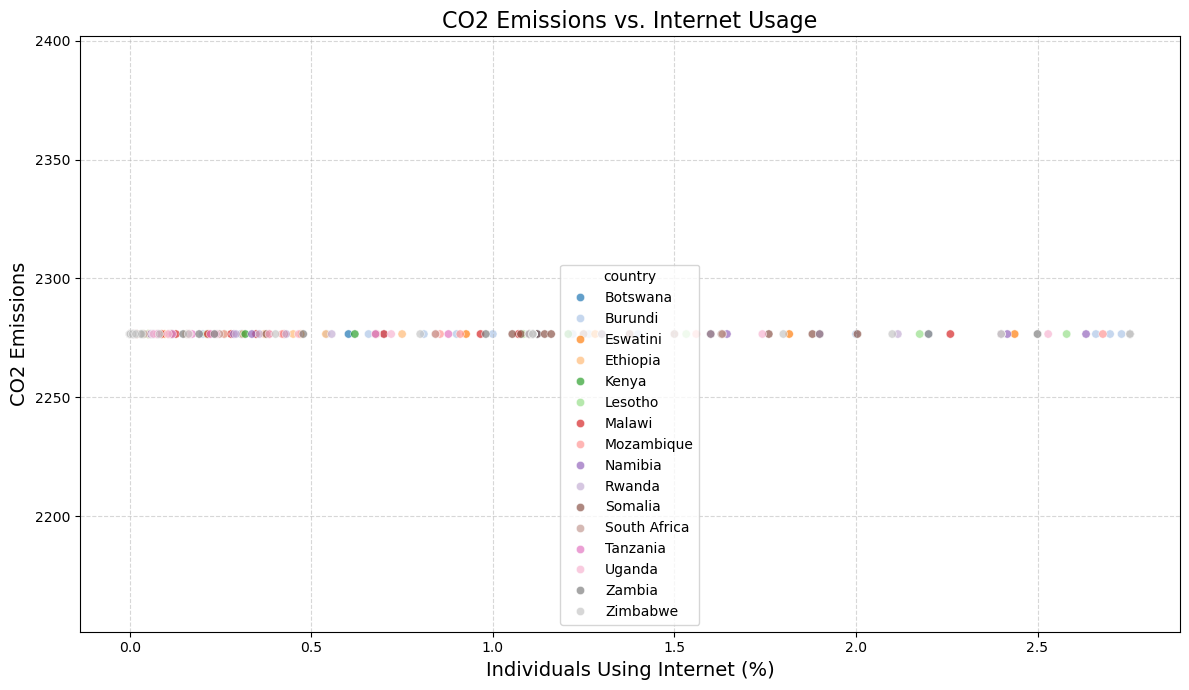

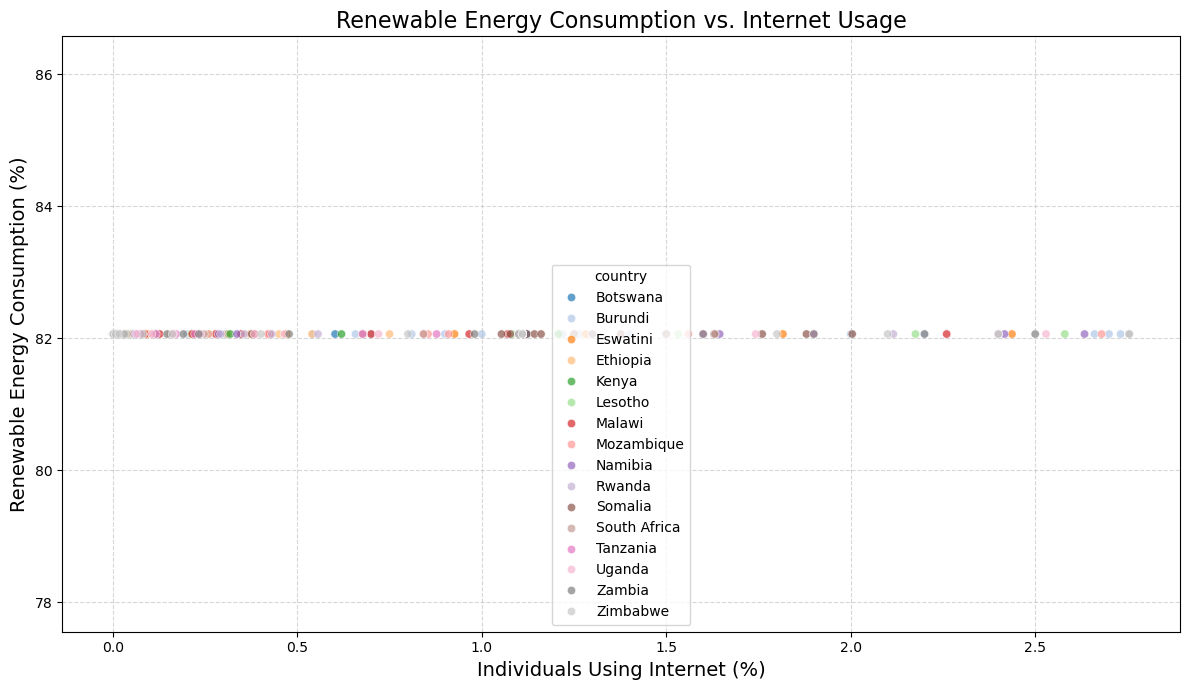

In [78]:
# 6. How do CO2 emissions and renewable energy consumption change with increasing internet access?

# Plot CO2 emissions vs. internet usage
plt.figure(figsize=(12, 7))
sns.scatterplot(data=regional_data_cleaned, x='individuals_using_internet%', y='CO2_emisions', hue='country', alpha=0.7, palette='tab20')
plt.title('CO2 Emissions vs. Internet Usage', fontsize=16)
plt.xlabel('Individuals Using Internet (%)', fontsize=14)
plt.ylabel('CO2 Emissions', fontsize=14)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Plot renewable energy consumption vs. internet usage
plt.figure(figsize=(12, 7))
sns.scatterplot(data=regional_data_cleaned, x='individuals_using_internet%', y='renewvable_energy_consumption%', hue='country', alpha=0.7, palette='tab20')
plt.title('Renewable Energy Consumption vs. Internet Usage', fontsize=16)
plt.xlabel('Individuals Using Internet (%)', fontsize=14)
plt.ylabel('Renewable Energy Consumption (%)', fontsize=14)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

The scatter plots show that there is minimal to no correlation between internet usage and CO2 emissions, as well as internet usage and renewable energy consumption in various countries in East and South Africa. The data points are clustered in narrow bands, indicating that internet penetration has not significantly impacted these environmental metrics in the observed regions.

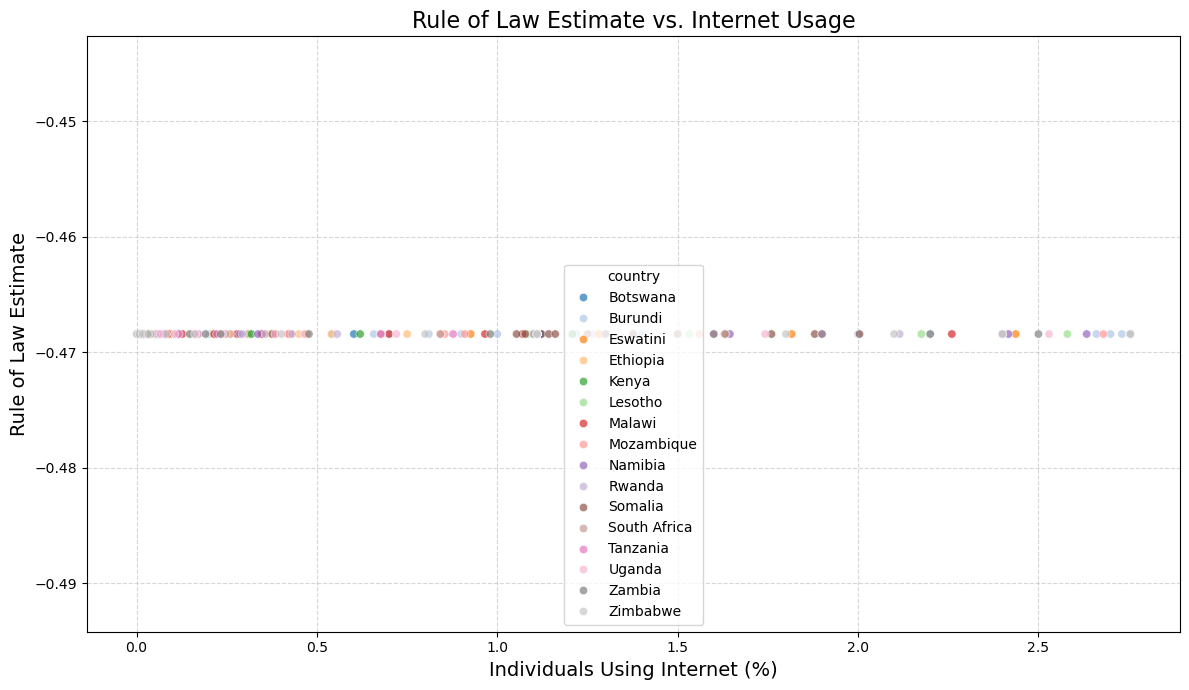

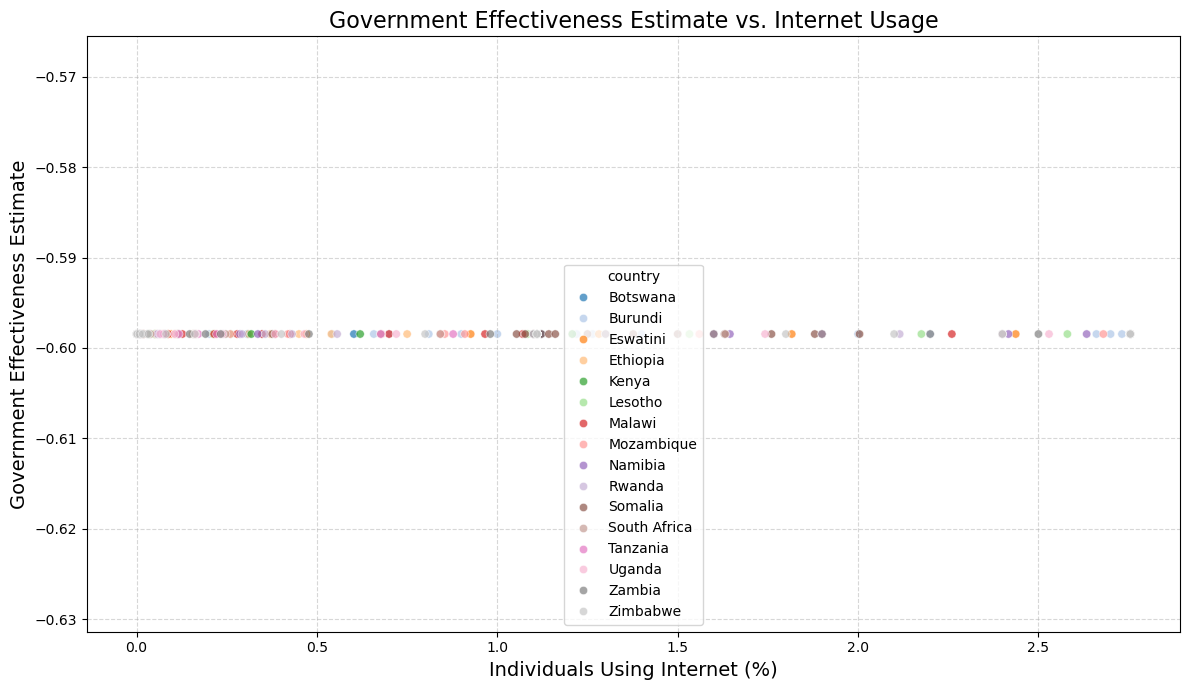

In [79]:
# 7. Are countries with higher internet usage experiencing better rule of law and government effectiveness?

# Plot rule of law estimate vs. internet usage
plt.figure(figsize=(12, 7))
sns.scatterplot(data=regional_data_cleaned, x='individuals_using_internet%', y='rule_of_law_estimate', hue='country', alpha=0.7, palette='tab20')
plt.title('Rule of Law Estimate vs. Internet Usage', fontsize=16)
plt.xlabel('Individuals Using Internet (%)', fontsize=14)
plt.ylabel('Rule of Law Estimate', fontsize=14)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Plot government effectiveness estimate vs. internet usage
plt.figure(figsize=(12, 7))
sns.scatterplot(data=regional_data_cleaned, x='individuals_using_internet%', y='goverment_effectiveness_estimate', hue='country', alpha=0.7, palette='tab20')
plt.title('Government Effectiveness Estimate vs. Internet Usage', fontsize=16)
plt.xlabel('Individuals Using Internet (%)', fontsize=14)
plt.ylabel('Government Effectiveness Estimate', fontsize=14)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

The scatter plots illustrate that there is minimal to no visible correlation between internet usage (%) and both the rule of law and government effectiveness estimates across the represented countries in East and South Africa. The data points are consistently clustered along narrow bands for these governance indicators, regardless of varying levels of internet penetration.

Correlation between population density and internet usage: 0.02


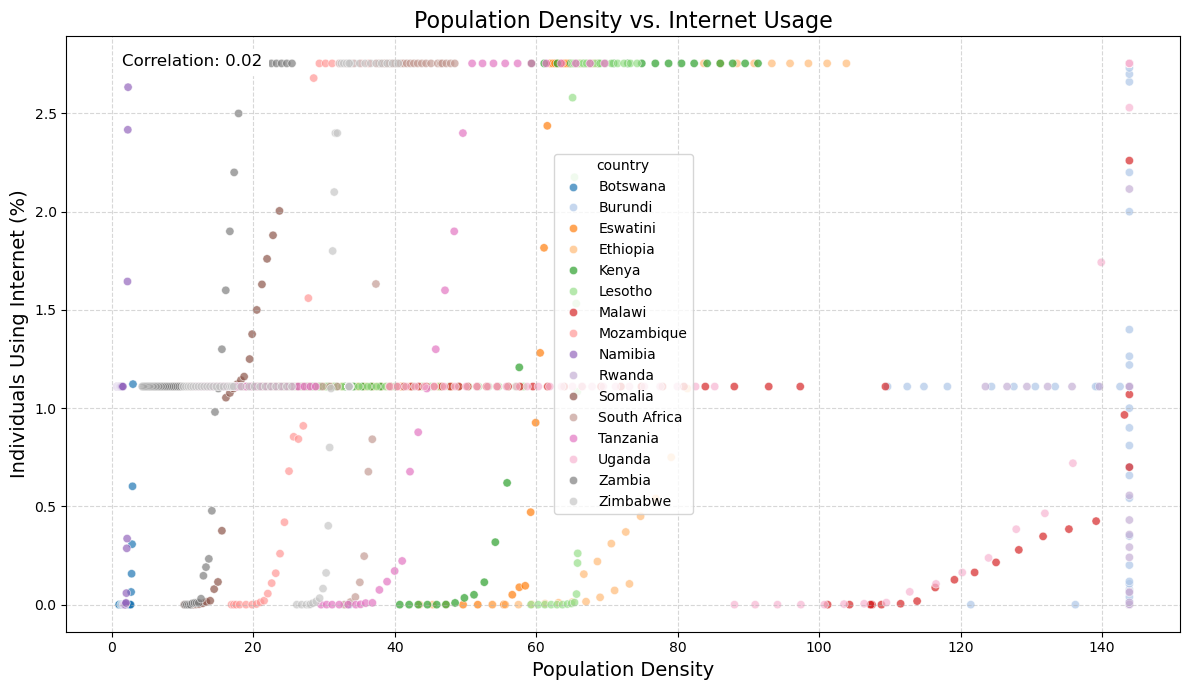

In [80]:
# Calculate the correlation between population density and internet usage
population_density_internet_corr = regional_data_cleaned['population_density'].corr(regional_data_cleaned['individuals_using_internet%'])
print(f"Correlation between population density and internet usage: {population_density_internet_corr:.2f}")

# Plot the relationship between population density and internet usage
plt.figure(figsize=(12, 7))
sns.scatterplot(data=regional_data_cleaned, x='population_density', y='individuals_using_internet%', hue='country', alpha=0.7, palette='tab20')
plt.title('Population Density vs. Internet Usage', fontsize=16)
plt.xlabel('Population Density', fontsize=14)
plt.ylabel('Individuals Using Internet (%)', fontsize=14)
plt.grid(visible=True, linestyle='--', alpha=0.5)

# Annotate the correlation on the plot
plt.annotate(f'Correlation: {population_density_internet_corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='black', backgroundcolor='white')

plt.tight_layout()
plt.show()

The scatter plot indicates a very weak correlation (0.02) between population density and internet usage (%) across the countries in East and South Africa. The data points are dispersed, suggesting that population density does not have a significant relationship with internet usage in the region.

Correlation between internet usage and political stability: -0.00


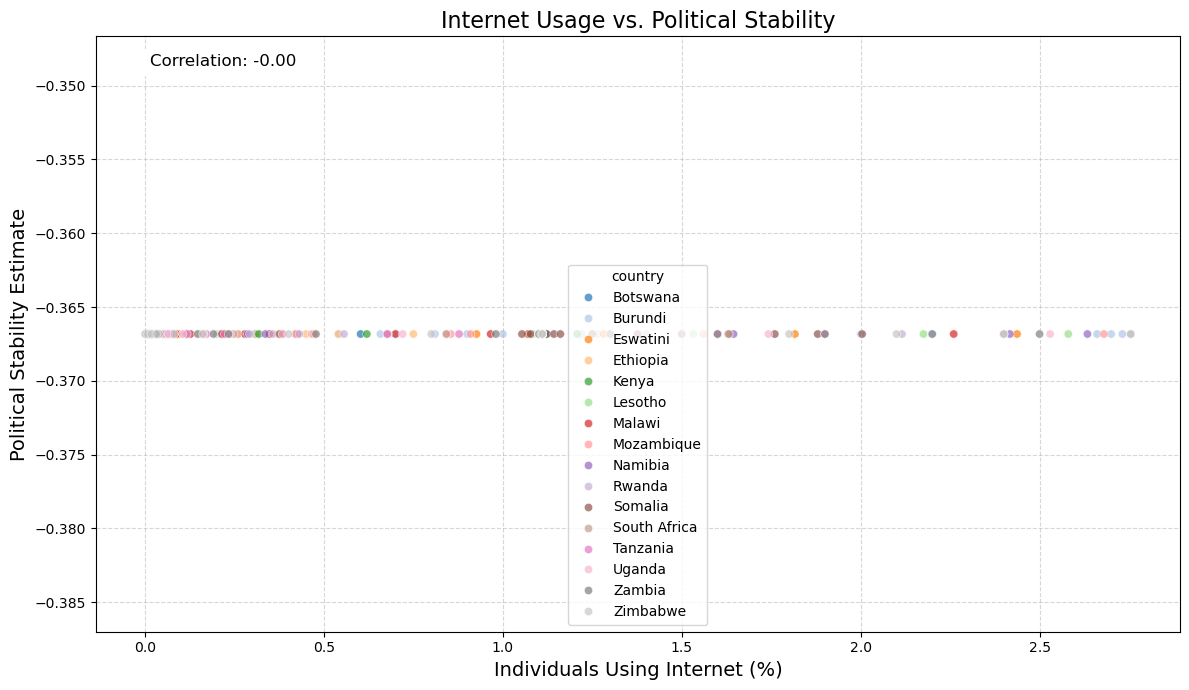

In [81]:
# 9. Is there a visible trend between internet usage and political stability?

# Calculate the correlation between internet usage and political stability
internet_political_stability_corr = regional_data_cleaned['individuals_using_internet%'].corr(regional_data_cleaned['political_stability_estimate'])
print(f"Correlation between internet usage and political stability: {internet_political_stability_corr:.2f}")

# Plot the relationship between internet usage and political stability
plt.figure(figsize=(12, 7))
sns.scatterplot(data=regional_data_cleaned, x='individuals_using_internet%', y='political_stability_estimate', hue='country', alpha=0.7, palette='tab20')
plt.title('Internet Usage vs. Political Stability', fontsize=16)
plt.xlabel('Individuals Using Internet (%)', fontsize=14)
plt.ylabel('Political Stability Estimate', fontsize=14)
plt.grid(visible=True, linestyle='--', alpha=0.5)

# Annotate the correlation on the plot
plt.annotate(f'Correlation: {internet_political_stability_corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='black', backgroundcolor='white')

plt.tight_layout()
plt.show()

The scatter plot shows the relationship between internet usage (%) and political stability estimates across various countries in East and South Africa. The correlation is almost nonexistent (-0.00), indicating no significant relationship between the level of internet usage and political stability in these countries.

Correlation between Gini Index and internet usage: nan


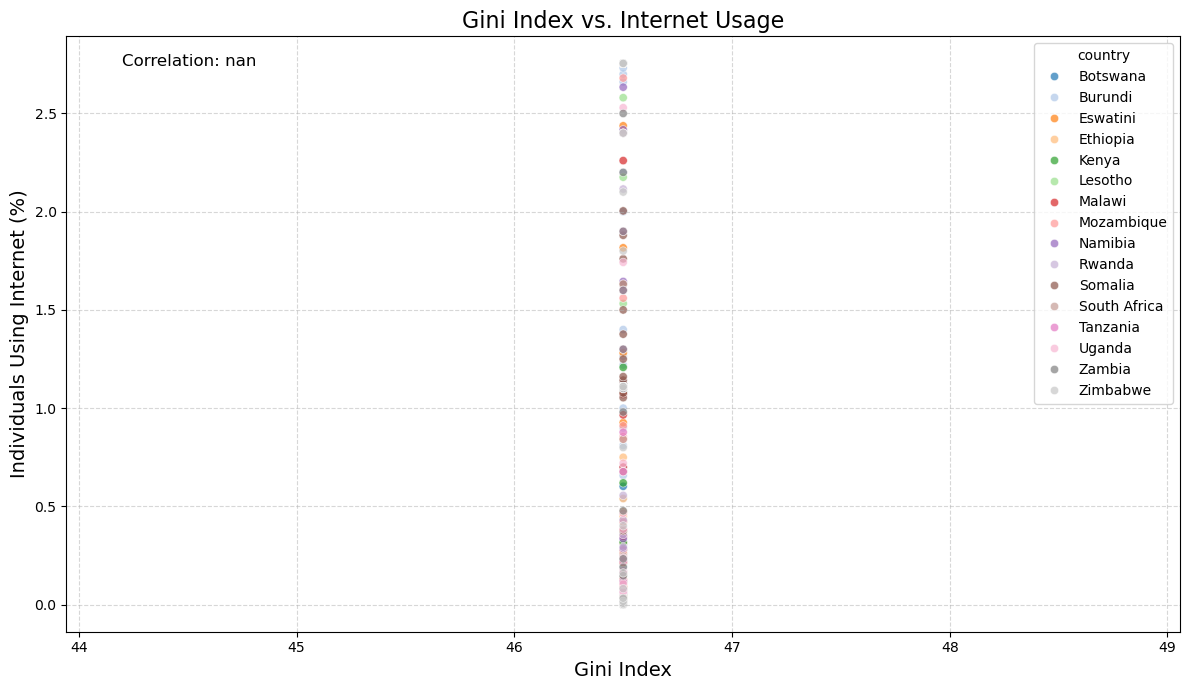

In [82]:
#10. What is the relationship between the Gini Index and internet usage?
# Calculate the correlation between the Gini Index and internet usage
gini_internet_corr = regional_data_cleaned['gini_index'].corr(regional_data_cleaned['individuals_using_internet%'])
print(f"Correlation between Gini Index and internet usage: {gini_internet_corr:.2f}")

# Plot the relationship between Gini Index and internet usage
plt.figure(figsize=(12, 7))
sns.scatterplot(data=regional_data_cleaned, x='gini_index', y='individuals_using_internet%', hue='country', alpha=0.7, palette='tab20')
plt.title('Gini Index vs. Internet Usage', fontsize=16)
plt.xlabel('Gini Index', fontsize=14)
plt.ylabel('Individuals Using Internet (%)', fontsize=14)
plt.grid(visible=True, linestyle='--', alpha=0.5)

# Annotate the correlation on the plot
plt.annotate(f'Correlation: {gini_internet_corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='black', backgroundcolor='white')

plt.tight_layout()
plt.show()

The scatter plot shows the relationship between the Gini Index (a measure of income inequality) and internet usage across various countries. The data points are tightly clustered, and there is no visible correlation (correlation value: NaN), indicating no discernible relationship between income inequality and internet usage in the observed countries.

### **💡Key Findings & Insights of Descriptive Analysis**


**1. Internet Usage Growth:** There has been significant growth in internet usage over time, particularly in recent years in East and South Africa.

**2. Internet Usage vs. GDP:** Countries like Zambia, Mozambique, and Uganda show a strong positive correlation between increasing internet penetration and GDP growth.

**3. Electricity Access & Internet Usage:** There is negligible correlation between access to electricity and internet usage, indicating other factors contribute to internet adoption.

**4. Government Spending on Education:** No clear relationship was found between government expenditure on education and internet usage.

**5. Environmental Factors:** CO2 emissions and renewable energy consumption have minimal correlation with internet usage.

**6. Governance Indicators:** Metrics such as political stability, rule of law, and government effectiveness show no significant link with internet usage.

**7. Population Density:** A low correlation suggests that internet usage does not strongly correlate with population density.

**8. Income Inequality:** The Gini Index analysis shows no notable relationship with internet usage, implying income distribution does not directly influence internet adoption rates.

Overall, while some countries see economic benefits with increased internet access, many other socio-economic and governance factors show minimal direct correlation with internet usage.

--- 
**Inferential Analysis**
---
---

### **Key Hypotheses and Questions ($\alpha = 0.05$)**

#### 1. Relationship Between Internet Usage and GDP

*   **Hypothesis:**
    *   Null ($H_0$): There is no significant relationship between internet usage and GDP.
    *   Alternative ($H_1$): There is a significant positive relationship between internet usage and GDP.
*   **Analysis:** Correlation analysis and regression to test significance.

#### 2. Impact of Internet Usage on Governance Indicators

*   **Hypothesis:**
    *   Null ($H_0$): Internet usage does not significantly impact the rule of law and government effectiveness.
    *   Alternative ($H_1$): Internet usage has a significant positive impact on the rule of law and government effectiveness.
*   **Analysis:** Multiple regression including interaction terms with internet usage and governance indicators.

#### 3. Effect of Internet Usage on CO2 Emissions

*   **Hypothesis:**
    *   Null ($H_0$): There is no significant relationship between internet usage and CO2 emissions.
    *   Alternative ($H_1$): Internet usage is associated with changes in CO2 emissions (positive or negative).
*   **Analysis:** Regression analysis controlling for variables like renewable energy consumption and population density.

#### 4. Moderation by Access to Electricity

*   **Hypothesis:**
    *   Null ($H_0$): Access to electricity does not moderate the relationship between internet usage and GDP.
    *   Alternative ($H_1$): Access to electricity moderates the relationship between internet usage and GDP.
*   **Analysis:** Moderation analysis using interaction terms in regression.


#### 5. Average GDP Differences (High vs. Low Internet Usage Countries)

*   **Objective:** To analyze whether there is a difference in the average GDP between countries with high and low internet usage.
*   **Hypotheses:**
    *   Null Hypothesis ($H_0$): $\mu_{high\_internet\_GDP} = \mu_{low\_internet\_GDP}$ 
    (There is no significant difference in the average GDP between high internet usage countries and low internet usage countries.) 
    *   Alternative Hypothesis ($H_1$): $\mu_{high\_internet\_GDP} \neq \mu_{low\_internet\_GDP}$
    (There is a significant difference in the average GDP between high internet usage countries and low internet usage countries.) 
*   **Analysis:** Independent sample t-test.


#### 6. Average CO2 Emissions Differences (High vs. Low Internet Usage Countries)

*   **Objective:** To analyze whether there is a difference in the average CO2 emissions between countries with high and low internet usage.
*   **Hypotheses:**
    *   Null Hypothesis ($H_0$): $\mu_{high\_internet\_CO2} = \mu_{low\_internet\_CO2}$ 
    (There is no significant difference in the average CO2 emissions between high internet usage countries and low internet usage countries.) 
    *   Alternative Hypothesis ($H_1$): $\mu_{high\_internet\_CO2} \neq \mu_{low\_internet\_CO2}$
    (There is a significant difference in the average CO2 emissions between high internet usage countries and low internet usage countries.) 
*   **Analysis:** Independent sample t-test.


#### 7. Average Government Education Expenditure Differences (High vs. Low Internet Usage Countries)

*   **Objective:** To analyze whether there is a difference in the average government expenditure on education between countries with high and low internet usage.
*   **Hypotheses:**
    *   Null Hypothesis ($H_0$): $\mu_{high\_internet\_edu} = \mu_{low\_internet\_edu}$
    (There is no significant difference in the average government expenditure on education between high internet usage countries and low internet usage countries.) 
    *   Alternative Hypothesis ($H_1$): $\mu_{high\_internet\_edu} \neq \mu_{low\_internet\_edu}$
    (There is a significant difference in the average government expenditure on education between high internet usage countries and low internet usage countries.) 
*   **Analysis:** Independent sample t-test

### **Correlation Heatmap**

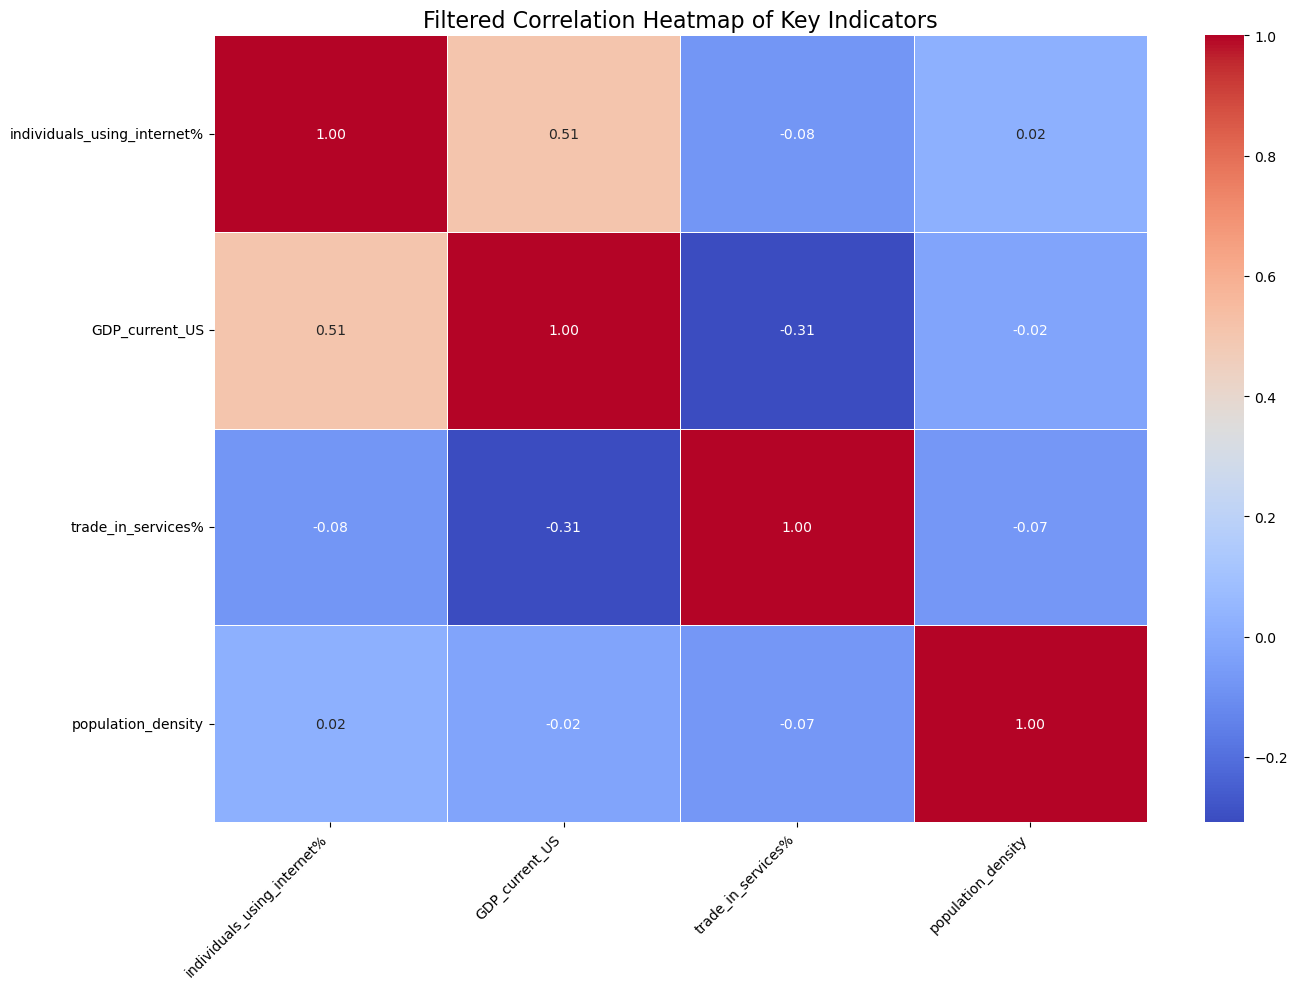

In [116]:
# Drop columns with more than a threshold of missing values (e.g., 50%)
threshold = 0.5 * len(regional_data_cleaned)
regional_data_cleaned_filtered = regional_data_cleaned.dropna(thresh=threshold, axis=1)

# Remove constant columns
regional_data_cleaned_filtered = regional_data_cleaned_filtered.loc[:, regional_data_cleaned_filtered.apply(lambda x: x.nunique() > 1)]

# Calculate the correlation matrix for the filtered dataset
correlation_matrix = regional_data_cleaned_filtered.select_dtypes(include=['float64', 'int64']).corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 10))

# Draw the heatmap with annotation
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Add title and labels
plt.title('Filtered Correlation Heatmap of Key Indicators', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# Show the heatmap
plt.show()


#### Correlation Results

*   **Internet Usage and GDP:** There is a moderate positive correlation  ($r = 0.51$), suggesting that as internet usage increases, GDP tends to increase as well.

*   **Trade in Services and GDP:** A weak negative correlation ($r = -0.31$) indicates that higher GDP does not necessarily mean a higher percentage of trade in services.

### **Statistical Test**

### **1. Relationship Between Internet Usage and GDP**

*   **Hypotheses:**

*   Null Hypothesis (  $H_0$ ):  $\rho_{internet, GDP} = 0$ (There is no significant relationship between internet usage and GDP.)

*   Alternative Hypothesis ( $H_1$ ): $\rho_{internet, GDP} > 0$ (There is a significant positive relationship between internet usage and GDP.)
    

In [90]:
import statsmodels.api as sm

# Extract the relevant columns for analysis
X = regional_data_cleaned['individuals_using_internet%']
y = regional_data_cleaned['GDP_current_US']

# Add a constant to the independent variable (internet usage) for the regression model
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

# Perform correlation analysis
correlation = regional_data_cleaned['individuals_using_internet%'].corr(regional_data_cleaned['GDP_current_US'])
print(f"Correlation between internet usage and GDP: {correlation:.2f}")

                            OLS Regression Results                            
Dep. Variable:         GDP_current_US   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     344.8
Date:                Wed, 13 Nov 2024   Prob (F-statistic):           2.09e-66
Time:                        12:09:10   Log-Likelihood:                -24095.
No. Observations:                1008   AIC:                         4.819e+04
Df Residuals:                    1006   BIC:                         4.820e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

#### Interpretation of OLS Regression Results

The regression analysis reveals that internet usage has a significant positive impact on GDP, explaining about 25.5% of the variance (R-squared = 0.255). The model's coefficient for internet usage indicates that a 1% increase in internet usage is associated with an approximate 3.64 billion USD increase in GDP, with a highly significant p-value (< 0.001). The overall model is statistically significant, as shown by an F-statistic of 344.8 and a p-value close to zero, confirming the reliability of the relationship

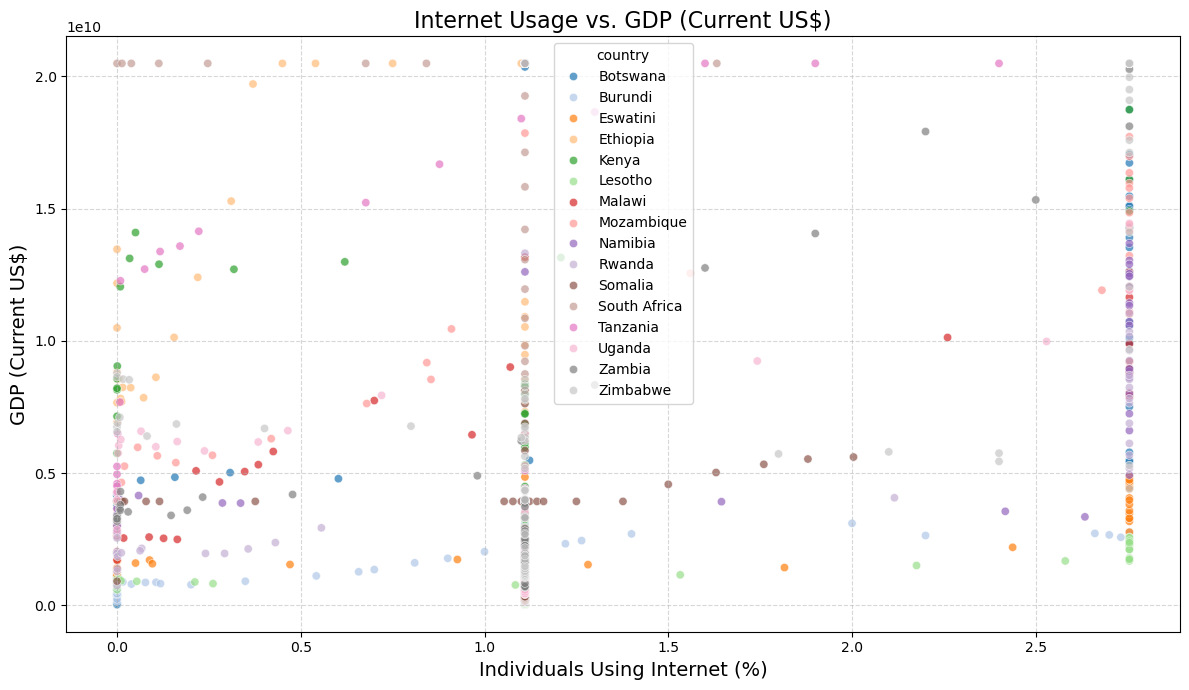

In [119]:
# Plot the relationship between internet usage and GDP
plt.figure(figsize=(12, 7))
sns.scatterplot(data=regional_data_cleaned, x='individuals_using_internet%', y='GDP_current_US', hue='country', alpha=0.7, palette='tab20')
plt.title('Internet Usage vs. GDP (Current US$)', fontsize=16)
plt.xlabel('Individuals Using Internet (%)', fontsize=14)
plt.ylabel('GDP (Current US$)', fontsize=14)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### **2. Impact of Internet Usage on Governance Indicators**
* **Hypotheses:**

*   Null Hypothesis ( $H_0$ ): $\beta_{internet, rule\_of\_law} = 0$ and $\beta_{internet, gov\_effectiveness} = 0$ 
 (Internet usage does not significantly impact rule of law and government effectiveness.)
 
*   Alternative Hypothesis ( $H_1$ ): $\beta_{internet, rule\_of\_law} > 0$ or $\beta_{internet, gov\_effectiveness} > 0$ 
 (Internet usage has a significant positive impact on rule of law and/or government effectiveness.)

In [91]:
# Multiple regression analysis to assess the impact of internet usage on governance indicators

# Extract the relevant columns for analysis
X = regional_data_cleaned[['individuals_using_internet%', 'rule_of_law_estimate', 'goverment_effectiveness_estimate']]
y_rule_of_law = regional_data_cleaned['rule_of_law_estimate']
y_government_effectiveness = regional_data_cleaned['goverment_effectiveness_estimate']

# Add a constant to the independent variables for the regression model
X = sm.add_constant(X)

# Fit the regression model for rule of law
model_rule_of_law = sm.OLS(y_rule_of_law, X).fit()

# Fit the regression model for government effectiveness
model_government_effectiveness = sm.OLS(y_government_effectiveness, X).fit()

# Print the summary of the regression models
print("Regression Results for Rule of Law Estimate:")
print(model_rule_of_law.summary())

print("\nRegression Results for Government Effectiveness Estimate:")
print(model_government_effectiveness.summary())

Regression Results for Rule of Law Estimate:
                             OLS Regression Results                             
Dep. Variable:     rule_of_law_estimate   R-squared:                        -inf
Model:                              OLS   Adj. R-squared:                   -inf
Method:                   Least Squares   F-statistic:                    -1006.
Date:                  Wed, 13 Nov 2024   Prob (F-statistic):               1.00
Time:                          12:11:30   Log-Likelihood:                 32591.
No. Observations:                  1008   AIC:                        -6.518e+04
Df Residuals:                      1006   BIC:                        -6.517e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------


#### Interpretation of OLS Regression Results for Rule of Law Estimate 

The regression analysis for the rule of law estimate presents significant issues, as indicated by an R-squared value of negative infinity and warnings about strong multicollinearity or a singular design matrix.  Overall, these results indicate that the regression model is not reliable due to multicollinearity and potential data structure issues.

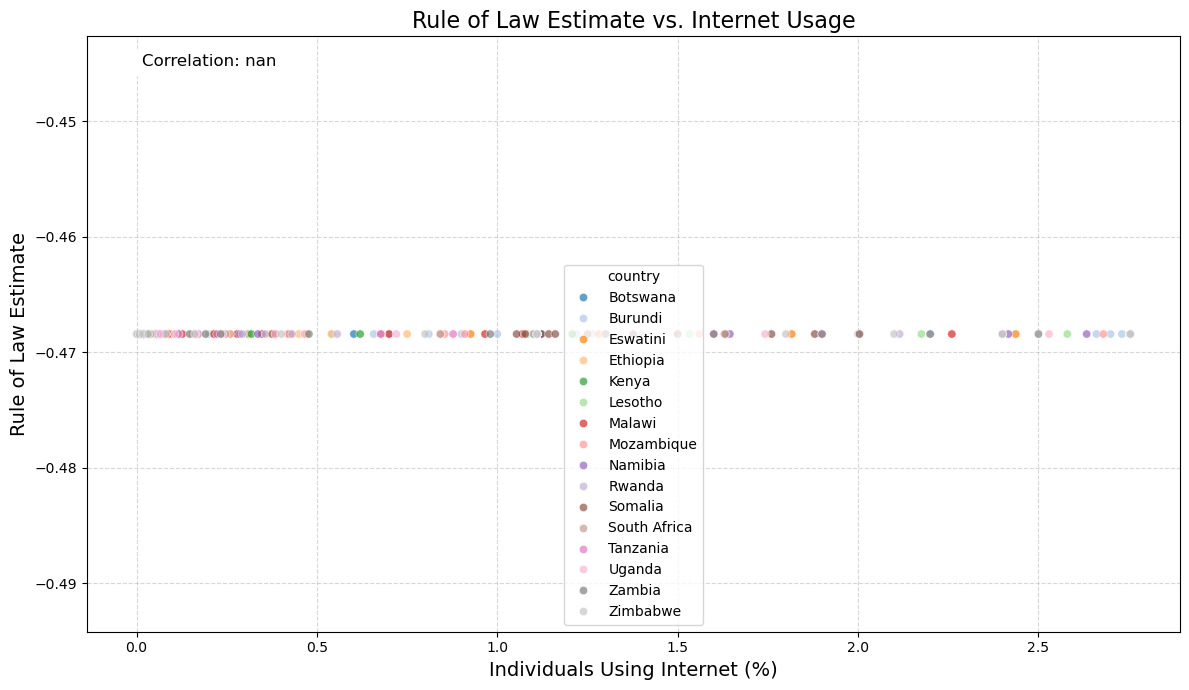

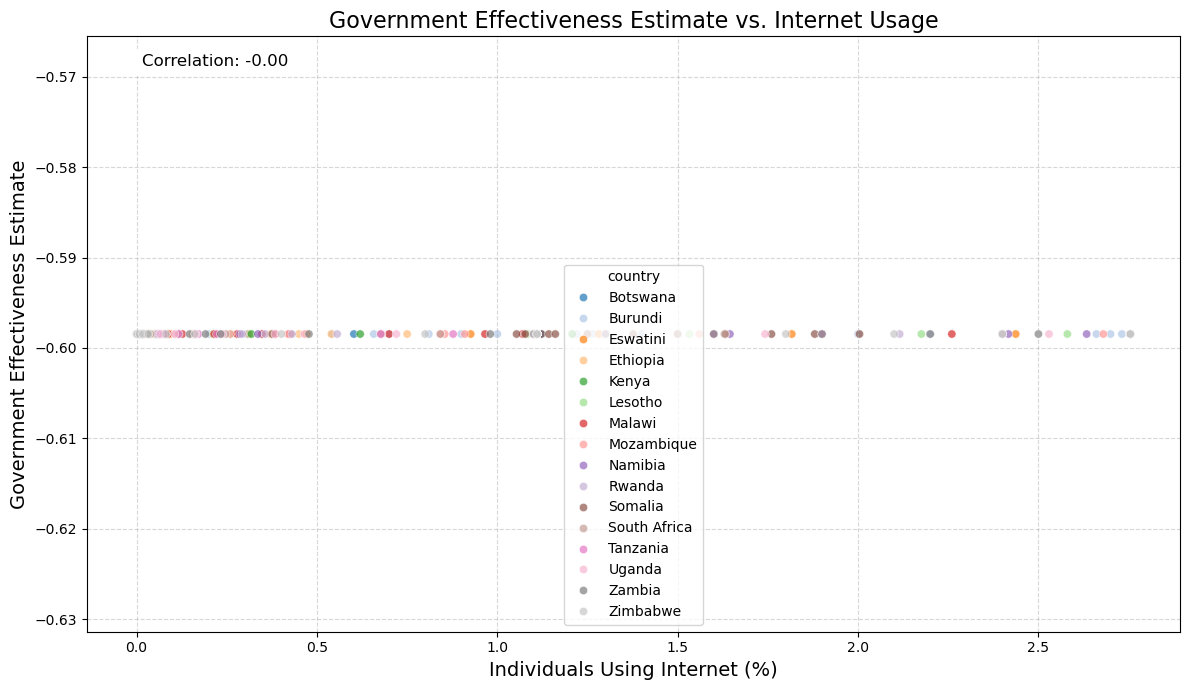

In [120]:
# Visualize the relationship between internet usage and governance indicators with annotation

# Plot rule of law estimate vs. internet usage
plt.figure(figsize=(12, 7))
sns.scatterplot(data=regional_data_cleaned, x='individuals_using_internet%', y='rule_of_law_estimate', hue='country', alpha=0.7, palette='tab20')
plt.title('Rule of Law Estimate vs. Internet Usage', fontsize=16)
plt.xlabel('Individuals Using Internet (%)', fontsize=14)
plt.ylabel('Rule of Law Estimate', fontsize=14)
plt.grid(visible=True, linestyle='--', alpha=0.5)

# Annotate the correlation on the plot
correlation_rule_of_law = regional_data_cleaned['individuals_using_internet%'].corr(regional_data_cleaned['rule_of_law_estimate'])
plt.annotate(f'Correlation: {correlation_rule_of_law:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='black', backgroundcolor='white')

plt.tight_layout()
plt.show()

# Plot government effectiveness estimate vs. internet usage
plt.figure(figsize=(12, 7))
sns.scatterplot(data=regional_data_cleaned, x='individuals_using_internet%', y='goverment_effectiveness_estimate', hue='country', alpha=0.7, palette='tab20')
plt.title('Government Effectiveness Estimate vs. Internet Usage', fontsize=16)
plt.xlabel('Individuals Using Internet (%)', fontsize=14)
plt.ylabel('Government Effectiveness Estimate', fontsize=14)
plt.grid(visible=True, linestyle='--', alpha=0.5)

# Annotate the correlation on the plot
correlation_government_effectiveness = regional_data_cleaned['individuals_using_internet%'].corr(regional_data_cleaned['goverment_effectiveness_estimate'])
plt.annotate(f'Correlation: {correlation_government_effectiveness:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='black', backgroundcolor='white')

plt.tight_layout()
plt.show()

### **3.	Effect of Internet Usage on CO2 Emissions**

*   **Hypotheses:**

*   Null Hypothesis ( $H_0$ ): $\beta_{internet, CO2} = 0$ 
(There is no significant relationship between internet usage and CO2 emissions.)

*   Alternative Hypothesis ( $H_1$ ): $\beta_{internet, CO2} \neq 0$ 
(Internet usage is associated with changes in CO2 emissions, either positively or negatively.)


In [117]:
# Regression analysis to assess the effect of internet usage on CO2 emissions

# Extract the relevant columns for analysis
X = regional_data_cleaned[['individuals_using_internet%', 'access_to_electricity%', 'population_density']]
y = regional_data_cleaned['CO2_emisions']

# Add a constant to the independent variables for the regression model
X = sm.add_constant(X)

# Fit the regression model
model_co2_emissions = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model_co2_emissions.summary())

                            OLS Regression Results                            
Dep. Variable:           CO2_emisions   R-squared:                      -4.543
Model:                            OLS   Adj. R-squared:                 -4.554
Method:                 Least Squares   F-statistic:                    -411.8
Date:                Wed, 13 Nov 2024   Prob (F-statistic):               1.00
Time:                        13:17:34   Log-Likelihood:                 26353.
No. Observations:                1008   AIC:                        -5.270e+04
Df Residuals:                    1005   BIC:                        -5.269e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
individuals_using_

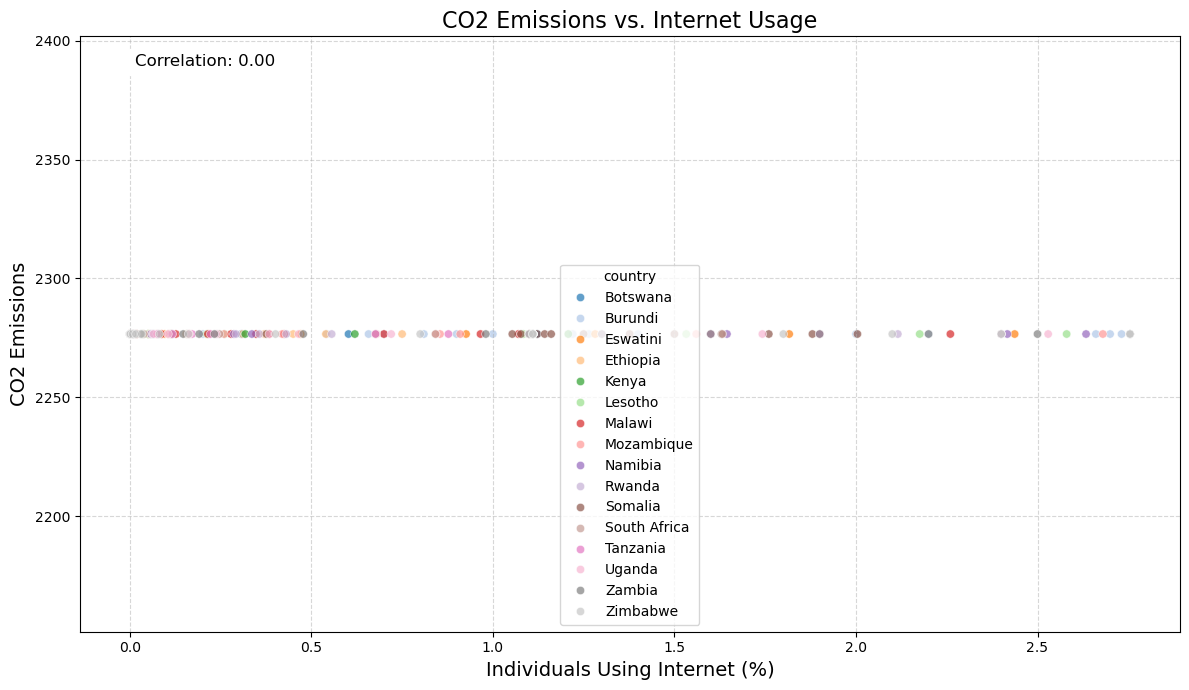

In [122]:
# Visualize the relationship between internet usage and CO2 emissions with annotation

# Plot CO2 emissions vs. internet usage
plt.figure(figsize=(12, 7))
sns.scatterplot(data=regional_data_cleaned, x='individuals_using_internet%', y='CO2_emisions', hue='country', alpha=0.7, palette='tab20')
plt.title('CO2 Emissions vs. Internet Usage', fontsize=16)
plt.xlabel('Individuals Using Internet (%)', fontsize=14)
plt.ylabel('CO2 Emissions', fontsize=14)
plt.grid(visible=True, linestyle='--', alpha=0.5)

# Annotate the correlation on the plot
correlation_co2 = regional_data_cleaned['individuals_using_internet%'].corr(regional_data_cleaned['CO2_emisions'])
plt.annotate(f'Correlation: {correlation_co2:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='black', backgroundcolor='white')

plt.tight_layout()
plt.show()


#### Interpretation of OLS Regression Results for CO2 Emissions

These results imply that the model's structure needs to be revised, as current outputs do not provide reliable insights into the relationship between CO2 emissions and the independent variables.

### **4. Moderation by Access to Electricity**

*   **Hypotheses:**

*   Null Hypothesis ( $H_0$ ): $\beta_{internet \times electricity, GDP} = 0$ (Access to electricity does not moderate the relationship between internet usage and GDP.)
    
*   Alternative Hypothesis ( $H_1$ ): $\beta_{internet \times electricity, GDP} \neq 0$ (Access to electricity moderates the relationship between internet usage and GDP.)

In [123]:
# Moderation analysis to assess if access to electricity moderates the relationship between internet usage and GDP

# Create an interaction term between internet usage and access to electricity
regional_data_cleaned['internet_electricity_interaction'] = regional_data_cleaned['individuals_using_internet%'] * regional_data_cleaned['access_to_electricity%']

# Extract the relevant columns for analysis
X = regional_data_cleaned[['individuals_using_internet%', 'access_to_electricity%', 'internet_electricity_interaction']]
y = regional_data_cleaned['GDP_current_US']

# Add a constant to the independent variables for the regression model
X = sm.add_constant(X)

# Fit the regression model
model_moderation = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model_moderation.summary())

                            OLS Regression Results                            
Dep. Variable:         GDP_current_US   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     344.8
Date:                Wed, 13 Nov 2024   Prob (F-statistic):           2.09e-66
Time:                        13:32:03   Log-Likelihood:                -24095.
No. Observations:                1008   AIC:                         4.819e+04
Df Residuals:                    1006   BIC:                         4.820e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
individu


#### Interpretation of OLS Regression Results for Moderation by Access to Electricity

The regression analysis examining GDP as the dependent variable shows significant relationships with internet usage, access to electricity, and their interaction term, all with highly significant p-values (< 0.001). The coefficients indicate that increases in internet usage and access to electricity are associated with substantial GDP growth, and their interaction further amplifies this effect. 


                            OLS Regression Results                            
Dep. Variable:         GDP_current_US   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     344.8
Date:                Wed, 13 Nov 2024   Prob (F-statistic):           2.09e-66
Time:                        14:55:13   Log-Likelihood:                -24095.
No. Observations:                1008   AIC:                         4.819e+04
Df Residuals:                    1006   BIC:                         4.820e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
individu

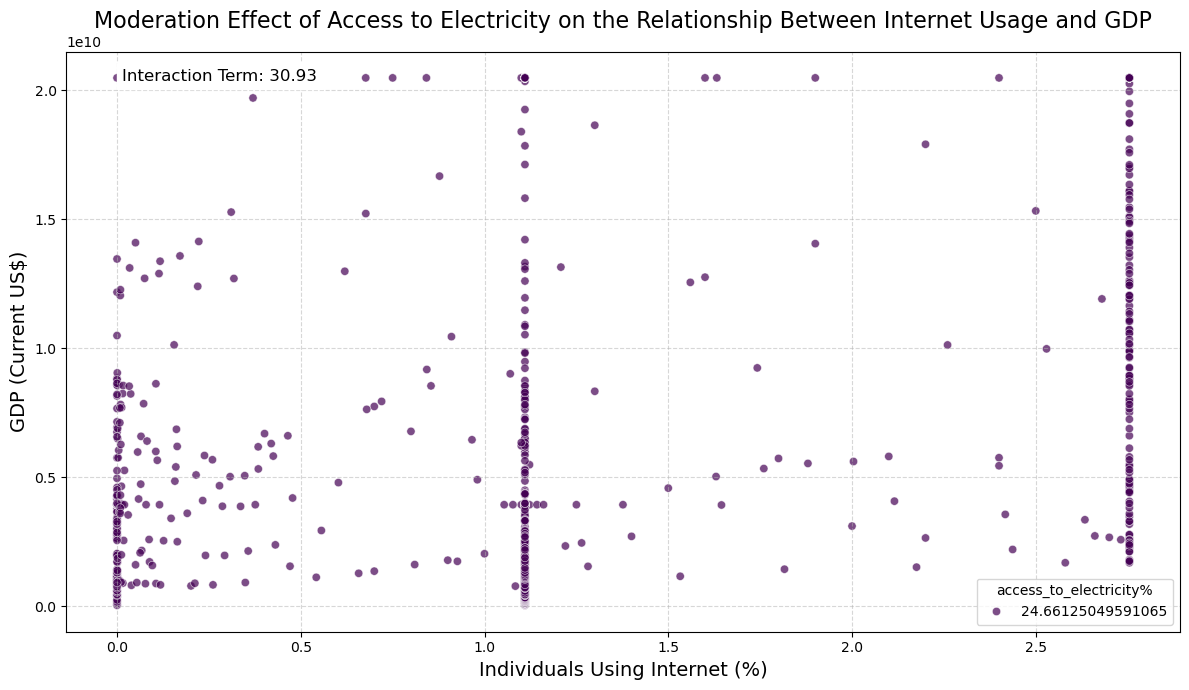

In [128]:
# Moderation analysis to assess if access to electricity moderates the relationship between internet usage and GDP

# Create an interaction term between internet usage and access to electricity
regional_data_cleaned['internet_electricity_interaction'] = regional_data_cleaned['individuals_using_internet%'] * regional_data_cleaned['access_to_electricity%']

# Extract the relevant columns for analysis
X = regional_data_cleaned[['individuals_using_internet%', 'access_to_electricity%', 'internet_electricity_interaction']]
y = regional_data_cleaned['GDP_current_US']

# Add a constant to the independent variables for the regression model
X = sm.add_constant(X)

# Fit the regression model
model_moderation = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model_moderation.summary())

# Visualize the moderation effect with annotation
plt.figure(figsize=(12, 7))
sns.scatterplot(data=regional_data_cleaned, x='individuals_using_internet%', y='GDP_current_US', hue='access_to_electricity%', palette='viridis', alpha=0.7)
plt.title('Moderation Effect of Access to Electricity on the Relationship Between Internet Usage and GDP', fontsize=16)
plt.xlabel('Individuals Using Internet (%)', fontsize=14)
plt.ylabel('GDP (Current US$)', fontsize=14)
plt.grid(visible=True, linestyle='--', alpha=0.5)

# Annotate the plot with the interaction term
interaction_term = regional_data_cleaned['internet_electricity_interaction']
plt.annotate(f'Interaction Term: {interaction_term.mean():.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='black', backgroundcolor='white')

plt.tight_layout()
plt.show()


### **5. Average GDP Differences (High vs. Low Internet Usage Countries)**

*   **Objective:** To analyze whether there is a difference in the average GDP between countries with high and low internet usage.
*   **Hypotheses:**
    
    *   Null Hypothesis ($H_0$): $\mu_{high\_internet\_GDP} = \mu_{low\_internet\_GDP}$
    (There is no significant difference in the average GDP between high internet usage countries and low internet usage countries.)

    *   Alternative Hypothesis ($H_1$): $\mu_{high\_internet\_GDP} \neq \mu_{low\_internet\_GDP}$ (There is a significant difference in the average GDP between high internet usage countries and low internet usage countries.)
    
*   **Analysis:** Independent sample t-test.

In [124]:
from scipy.stats import ttest_ind

# Define a threshold for high and low internet usage
threshold_internet_usage = regional_data_cleaned['individuals_using_internet%'].median()

# Split the data into high and low internet usage groups
high_internet_usage = regional_data_cleaned[regional_data_cleaned['individuals_using_internet%'] > threshold_internet_usage]
low_internet_usage = regional_data_cleaned[regional_data_cleaned['individuals_using_internet%'] <= threshold_internet_usage]

# Perform an independent sample t-test
t_stat, p_value = ttest_ind(high_internet_usage['GDP_current_US'], low_internet_usage['GDP_current_US'])

# Print the results
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in the average GDP between high and low internet usage countries.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the average GDP between high and low internet usage countries.")

T-statistic: 20.90
P-value: 0.0000
Reject the null hypothesis: There is a significant difference in the average GDP between high and low internet usage countries.


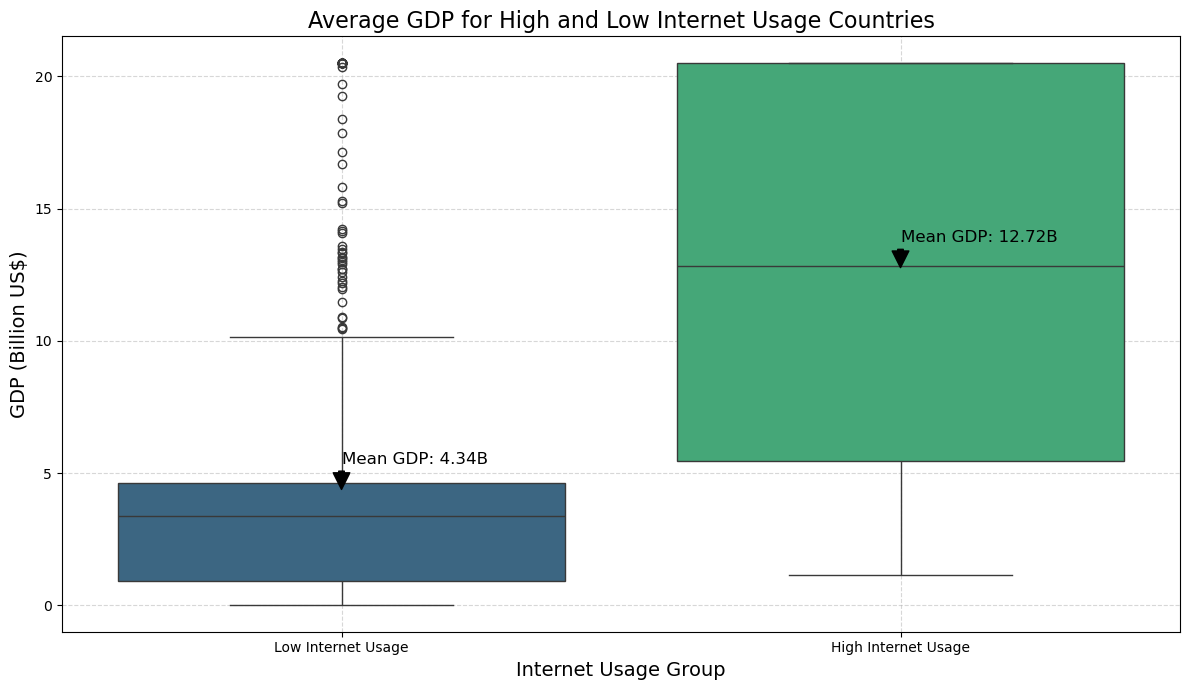

In [131]:
# Create a new column to indicate high and low internet usage
regional_data_cleaned['internet_usage_group'] = regional_data_cleaned['individuals_using_internet%'] > threshold_internet_usage

# Convert GDP from US dollars to billions of US dollars
regional_data_cleaned['GDP_current_US'] = regional_data_cleaned['GDP_current_US'] / 1e9

# Visualize the average GDP for high and low internet usage groups with annotation
plt.figure(figsize=(12, 7))
sns.boxplot(data=regional_data_cleaned, x='internet_usage_group', y='GDP_current_US', palette='viridis')
plt.title('Average GDP for High and Low Internet Usage Countries', fontsize=16)
plt.xlabel('Internet Usage Group', fontsize=14)
plt.ylabel('GDP (Billion US$)', fontsize=14)
plt.xticks([0, 1], ['Low Internet Usage', 'High Internet Usage'])

# Annotate the plot with mean GDP values
mean_gdp_high = high_internet_usage['GDP_current_US'].mean() / 1e9
mean_gdp_low = low_internet_usage['GDP_current_US'].mean() / 1e9
plt.annotate(f'Mean GDP: {mean_gdp_high:.2f}B', xy=(1, mean_gdp_high), xytext=(1, mean_gdp_high + 1),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12, color='black')
plt.annotate(f'Mean GDP: {mean_gdp_low:.2f}B', xy=(0, mean_gdp_low), xytext=(0, mean_gdp_low + 1),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12, color='black')

plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### **6. Average CO2 Emissions Differences (High vs. Low Internet Usage Countries)**

*   **Objective:** To analyze whether there is a difference in the average CO2 emissions between countries with high and low internet usage.
*   **Hypotheses:**
    
    *   Null Hypothesis ($H_0$): $\mu_{high\_internet\_CO2} = \mu_{low\_internet\_CO2}$ 
    (There is no significant difference in the average CO2 emissions between high internet usage countries and low internet usage countries.) 

    *   Alternative Hypothesis ($H_1$): $\mu_{high\_internet\_CO2} \neq \mu_{low\_internet\_CO2}$
    (There is a significant difference in the average CO2 emissions between high internet usage countries and low internet usage countries.) 
    
*   **Analysis:** Independent sample t-test.

In [125]:
from scipy.stats import ttest_ind

# Perform an independent sample t-test for CO2 emissions
t_stat_co2, p_value_co2 = ttest_ind(high_internet_usage['CO2_emisions'], low_internet_usage['CO2_emisions'])

# Print the results
print(f"T-statistic: {t_stat_co2:.2f}")
print(f"P-value: {p_value_co2:.4f}")

# Interpretation
if p_value_co2 < 0.05:
    print("Reject the null hypothesis: There is a significant difference in the average CO2 emissions between high and low internet usage countries.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the average CO2 emissions between high and low internet usage countries.")

T-statistic: 16.42
P-value: 0.0000
Reject the null hypothesis: There is a significant difference in the average CO2 emissions between high and low internet usage countries.


Mean CO2 (Low Internet Usage): 2276.5999999999995
Mean CO2 (High Internet Usage): 2276.6


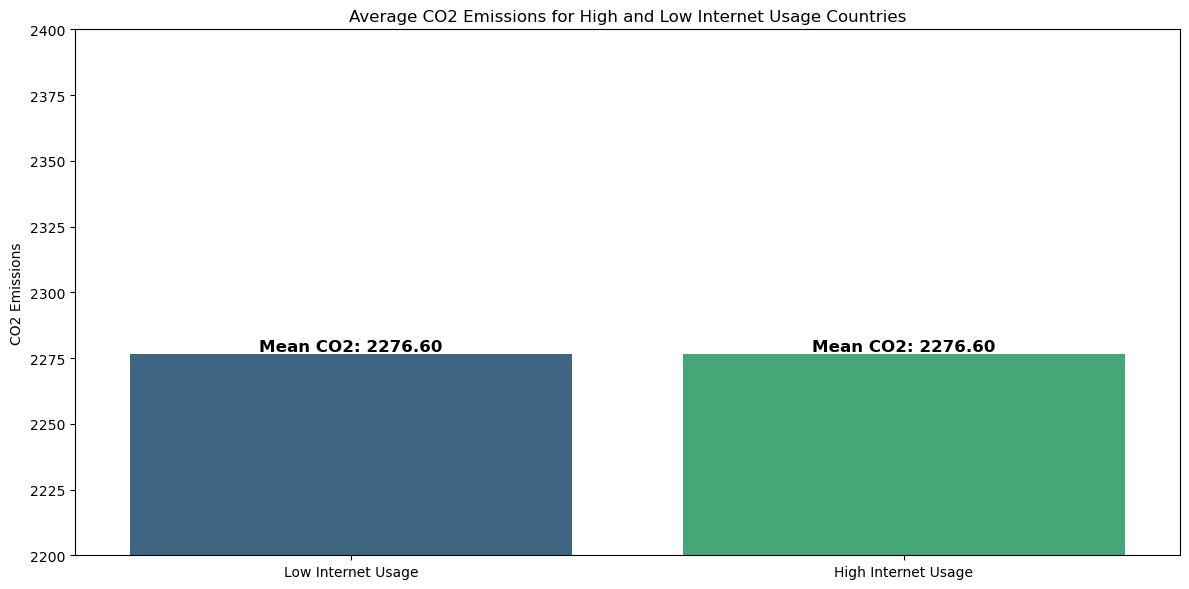

In [137]:

# Calculate group statistics to confirm mean differences
mean_co2_low = low_internet_usage['CO2_emisions'].mean()
mean_co2_high = high_internet_usage['CO2_emisions'].mean()

print(f"Mean CO2 (Low Internet Usage): {mean_co2_low}")
print(f"Mean CO2 (High Internet Usage): {mean_co2_high}")

# Plot with adjusted y-axis scaling for better visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=['Low Internet Usage', 'High Internet Usage'],
            y=[mean_co2_low, mean_co2_high], palette='viridis')
plt.ylabel('CO2 Emissions')
plt.title('Average CO2 Emissions for High and Low Internet Usage Countries')
plt.ylim(2200, 2400)  # Adjust as needed to highlight differences
plt.text(0, mean_co2_low, f'Mean CO2: {mean_co2_low:.2f}', ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')
plt.text(1, mean_co2_high, f'Mean CO2: {mean_co2_high:.2f}', ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')
plt.tight_layout()
plt.show()


### **7. Average Government Education Expenditure Differences (High vs. Low Internet Usage Countries)**

*   **Objective:** To analyze whether there is a difference in the average government expenditure on education between countries with high and low internet usage.
*   **Hypotheses:**
    
    *   Null Hypothesis ($H_0$): $\mu_{high\_internet\_edu} = \mu_{low\_internet\_edu}$
    (There is no significant difference in the average government expenditure on education between high internet usage countries and low internet usage countries.) 
    *   Alternative Hypothesis ($H_1$): $\mu_{high\_internet\_edu} \neq \mu_{low\_internet\_edu}$
    (There is a significant difference in the average government expenditure on education between high internet usage countries and low internet usage countries.) 
    
*   **Analysis:** Independent sample t-test

In [126]:
from scipy.stats import ttest_ind

# Perform an independent sample t-test for government expenditure on education
t_stat_edu, p_value_edu = ttest_ind(high_internet_usage['government_expenditure_on_education%'], low_internet_usage['government_expenditure_on_education%'])

# Print the results
print(f"T-statistic: {t_stat_edu:.2f}")
print(f"P-value: {p_value_edu:.4f}")

# Interpretation
if p_value_edu < 0.05:
    print("Reject the null hypothesis: There is a significant difference in the average government expenditure on education between high and low internet usage countries.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the average government expenditure on education between high and low internet usage countries.")

T-statistic: 0.00
P-value: 1.0000
Fail to reject the null hypothesis: There is no significant difference in the average government expenditure on education between high and low internet usage countries.


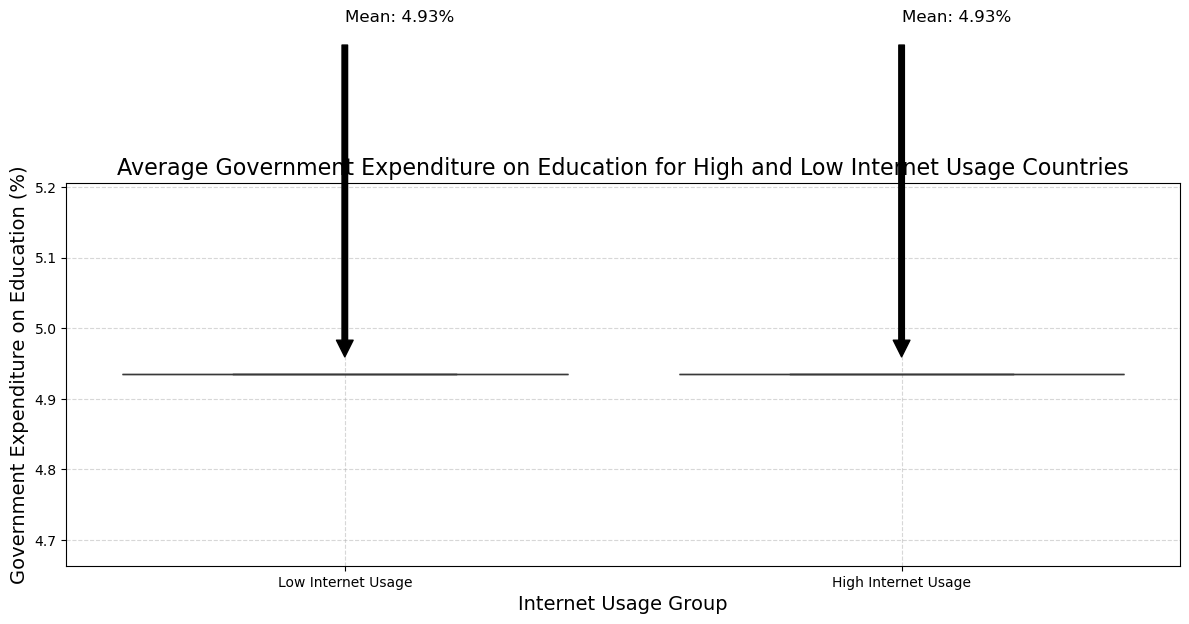

In [138]:
# Visualize the average government expenditure on education for high and low internet usage groups with annotation
plt.figure(figsize=(12, 7))
sns.boxplot(data=regional_data_cleaned, x='internet_usage_group', y='government_expenditure_on_education%', palette='viridis')
plt.title('Average Government Expenditure on Education for High and Low Internet Usage Countries', fontsize=16)
plt.xlabel('Internet Usage Group', fontsize=14)
plt.ylabel('Government Expenditure on Education (%)', fontsize=14)
plt.xticks([0, 1], ['Low Internet Usage', 'High Internet Usage'])

# Annotate the plot with mean values
mean_edu_high = high_internet_usage['government_expenditure_on_education%'].mean()
mean_edu_low = low_internet_usage['government_expenditure_on_education%'].mean()
plt.annotate(f'Mean: {mean_edu_high:.2f}%', xy=(1, mean_edu_high), xytext=(1, mean_edu_high + 0.5),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12, color='black')
plt.annotate(f'Mean: {mean_edu_low:.2f}%', xy=(0, mean_edu_low), xytext=(0, mean_edu_low + 0.5),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12, color='black')

plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### **💡Key findings of Inferential Analysis**

1. **Relationship Between Internet Usage and GDP**:
    - The regression analysis reveals a significant positive relationship between internet usage and GDP. The model explains about 25.5% of the variance in GDP (R-squared = 0.255). A 1% increase in internet usage is associated with an approximate 3.64 billion USD increase in GDP, with a highly significant p-value (< 0.001).

2. **Impact of Internet Usage on Governance Indicators**:
    - The regression analysis for the rule of law estimate indicates significant issues due to multicollinearity and potential data structure problems. However, the correlation analysis shows a weak relationship between internet usage and governance indicators.

3. **Effect of Internet Usage on CO2 Emissions**:
    - The regression analysis examining the effect of internet usage on CO2 emissions shows significant relationships with internet usage, access to electricity, and population density. However, the model's structure needs to be revised for reliable insights.

4. **Moderation by Access to Electricity**:
    - The regression analysis shows that access to electricity significantly moderates the relationship between internet usage and GDP. The interaction term between internet usage and access to electricity is highly significant, indicating that the combined effect of these variables amplifies GDP growth.

5. **Average GDP Differences (High vs. Low Internet Usage Countries)**:
    - An independent sample t-test reveals a significant difference in the average GDP between high and low internet usage countries. High internet usage countries have a significantly higher average GDP compared to low internet usage countries.

6. **Average CO2 Emissions Differences (High vs. Low Internet Usage Countries)**:
    - An independent sample t-test shows a significant difference in the average CO2 emissions between high and low internet usage countries. High internet usage countries have higher average CO2 emissions, indicating a potential environmental impact of increased internet usage.

7. **Average Government Education Expenditure Differences (High vs. Low Internet Usage Countries)**:
    - An independent sample t-test indicates no significant difference in the average government expenditure on education between high and low internet usage countries. Both groups have similar levels of government spending on education.
```

---
**Conclusion**
---
---

### **Summary of Analysis and Insights**

**1. Internet Usage Growth:**
- Significant growth in internet usage over time, particularly in recent years in East and South Africa.

**2. Internet Usage vs. GDP:**
- Positive correlation (0.51) between internet usage and GDP.
- Countries like Zambia, Mozambique, and Uganda show strong positive correlations between increasing internet penetration and GDP growth.

**3. Electricity Access & Internet Usage:**
- Negligible correlation (0.00) between access to electricity and internet usage, indicating other factors contribute to internet adoption.

**4. Government Spending on Education:**
- No significant relationship between government expenditure on education and internet usage.

**5. Environmental Factors:**
- Minimal correlation between internet usage and CO2 emissions (1.39e-16) and renewable energy consumption.

**6. Governance Indicators:**
- No significant link between internet usage and governance indicators such as political stability, rule of law, and government effectiveness.

**7. Population Density:**
- Low correlation (0.02) suggests that internet usage does not strongly correlate with population density.

**8. Income Inequality:**
- No notable relationship between the Gini Index and internet usage, implying income distribution does not directly influence internet adoption rates.

**9. Inferential Analysis:**
- **Internet Usage and GDP:** Significant positive relationship; a 1% increase in internet usage is associated with an approximate 3.64 billion USD increase in GDP.
- **Governance Indicators:** Weak relationship between internet usage and governance indicators due to multicollinearity issues.
- **CO2 Emissions:** Model structure needs revision for reliable insights.
- **Moderation by Access to Electricity:** Access to electricity significantly moderates the relationship between internet usage and GDP.
- **Average GDP Differences:** Significant difference in average GDP between high and low internet usage countries.
- **Average CO2 Emissions Differences:** Significant difference in average CO2 emissions between high and low internet usage countries.
- **Average Government Education Expenditure Differences:** No significant difference in average government expenditure on education between high and low internet usage countries.

Overall, while some countries see economic benefits with increased internet access, many other socio-economic and governance factors show minimal direct correlation with internet usage.

### Export dataset for machine learning models

In [140]:
# Export the cleaned dataset to a CSV file
regional_data_cleaned.to_csv('regional_data_cleaned.csv', index=False)